In [1]:
# import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 

In [2]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [3]:
# read data 
df=pd.read_csv('ppg_corrosion.csv')

In [4]:
df

X01       X02       X03        X04        X05        X06       X07  \
0      52.4988   22.4352   15.7248   6.300127   2.130775   1.396948  0.169325   
1     163.6560  161.7176  164.0408   8.108419  13.026321  15.191390  2.292762   
2     218.9088  217.9228  212.4132   5.880993   7.158718   7.370378 -0.551242   
3      45.7112   29.8620   26.9060   6.656470   3.076322   2.237222  0.380476   
4     244.6048  141.9512  129.5172   5.024004  16.503552  19.441422 -1.712171   
...        ...       ...       ...        ...        ...        ...       ...   
1995  164.0856  137.2884  113.3964  36.614804  54.923099  54.589736 -0.593199   
1996   42.5652   24.2252   21.2204   5.840698   2.702755   2.306474  0.335472   
1997   80.9216   71.1844   67.2952  25.794051  38.100226  41.485642 -0.515049   
1998  136.0328   62.9732   33.6664   8.161699   6.332241   4.890635  1.262157   
1999  126.4380  119.4280  127.2596  13.291582  13.517367  12.350425 -0.764488   

           X08       X09       X10  ...         X70          X71     X72  \
0     0.165502 -0.435505  2.164313  ...  114.475601   395.783685  0.5492   
1    -2.654124 -2.700556  8.429188  ...  111.268083  1116.853313  0.7908   
2    -0.718916 -0.860859  4.751198  ...  101.217219  1611.247241  0.9060   
3     0.434857  0.033068  2.156228  ...  121.376398   652.679503  0.6440   
4     1.971901  1.974853  7.476739  ...   68.184074  1072.486039  0.7736   
...        ...       ...       ...  ...         ...          ...     ...   
1995 -0.636593 -0.495143  2.268658  ...   30.718405  1812.093299  0.9432   
1996  0.537995  0.313693  2.374385  ...  127.580076   611.538462  0.6344   
1997 -0.302666 -0.216146  1.697923  ...   45.252311  1452.745841  0.8656   
1998  1.915884  2.202250  6.302768  ...  114.696552  1460.018851  0.8700   
1999 -1.018323 -0.429107  4.132570  ...   70.186795  1871.270790  0.9572   

           X73           X74       X75           X76        X77           X78  \
0     0.073049    888.703569  0.002911    515.732996  57.139364   2211.942462   
1     0.050112  24964.871523  0.001674  20294.367898  39.680852  16779.045018   
2     0.043729  45281.834879  0.001453  40845.652236  34.635325  10159.520530   
3     0.062262   1126.320497  0.002554    796.709264  48.727540   1968.103727   
4     0.051221  28473.791624  0.001706  23440.503221  40.563108  20032.938987   
...        ...           ...       ...           ...        ...           ...   
1995  0.042067  21328.518236  0.001456  19595.830121  33.269305   3839.905004   
1996  0.063441    842.618537  0.002734    585.553772  49.465321   1282.624212   
1997  0.046187   6109.939926  0.001883   5280.458892  36.252013   3181.100739   
1998  0.045659   6443.152184  0.001618   5719.772883  36.068557   2061.489655   
1999  0.041436  14538.563310  0.001420  13644.766405  32.782707   1569.125784   

      corrosion  
0           yes  
1            no  
2            no  
3           yes  
4            no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[2000 rows x 79 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 79 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X01        2000 non-null   float64
 1   X02        2000 non-null   float64
 2   X03        2000 non-null   float64
 3   X04        2000 non-null   float64
 4   X05        2000 non-null   float64
 5   X06        2000 non-null   float64
 6   X07        2000 non-null   float64
 7   X08        2000 non-null   float64
 8   X09        2000 non-null   float64
 9   X10        2000 non-null   float64
 10  X11        2000 non-null   float64
 11  X12        2000 non-null   float64
 12  X13        2000 non-null   float64
 13  X14        2000 non-null   float64
 14  X15        2000 non-null   float64
 15  X16        2000 non-null   int64  
 16  X17        2000 non-null   int64  
 17  X18        2000 non-null   int64  
 18  X19        2000 non-null   float64
 19  X20        2000 non-null   float64
 20  X21     

Big scale difference, need standardize the data

In [6]:
input_features = df.select_dtypes('number').copy().columns

In [7]:
lf = df.copy().reset_index().rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'corrosion'], value_vars=input_features, ignore_index=True)

In [8]:
small_skew_inputs = input_features[ df.select_dtypes('number').skew().between(-0.35, 0.35, inclusive='both') ]

In [9]:
#Check 0 values
lf.loc[ (lf.value == 0), :].groupby(['variable']).size()

Series([], dtype: int64)

In [10]:
# check negative values
lf.loc[ (~lf.variable.isin(small_skew_inputs)) & (lf.value < 0), :].groupby(['variable']).size()

variable
X08    627
X09    630
dtype: int64

In [11]:
lf_skew = lf.loc[ ~lf.variable.isin(small_skew_inputs), :].copy()

lf_skew = lf_skew.loc[ ~lf_skew.variable.isin(['X08', 'X09']), :].copy()

In [12]:
lf_skew['log_value'] = np.log( lf_skew.value )

In [13]:
lf_1=lf.loc[ lf.variable.isin(small_skew_inputs), :].copy()

In [14]:
lf_1['log_value'] =lf.loc[ lf.variable.isin(small_skew_inputs), :].copy().value

In [15]:
lf_2=lf.loc[ lf.variable.isin(['X08', 'X09']), :].copy()

In [16]:
lf_2['log_value'] =lf_2.value

In [17]:
lf_skew.shape

(132000, 5)

In [18]:
lf_2.shape

(4000, 5)

In [19]:
df_combine=pd.concat([lf_1,lf_2,lf_skew],ignore_index=True)

In [20]:
df_combine

rowid corrosion variable        value   log_value
0           0       yes      X01    52.498800   52.498800
1           1        no      X01   163.656000  163.656000
2           2        no      X01   218.908800  218.908800
3           3       yes      X01    45.711200   45.711200
4           4        no      X01   244.604800  244.604800
...       ...       ...      ...          ...         ...
155995   1995       yes      X78  3839.905004    8.253203
155996   1996       yes      X78  1282.624212    7.156663
155997   1997       yes      X78  3181.100739    8.064983
155998   1998       yes      X78  2061.489655    7.631184
155999   1999       yes      X78  1569.125784    7.358274

[156000 rows x 5 columns]

In [21]:
df_wide=df_combine.pivot_table(index=['rowid','corrosion'],columns='variable', values='log_value').reset_index()

In [22]:
df_wide

variable  rowid corrosion       X01       X02       X03       X04       X05  \
0             0       yes   52.4988   22.4352  2.755239  1.840570  0.756486   
1             1        no  163.6560  161.7176  5.100115  2.092903  2.566972   
2             2        no  218.9088  217.9228  5.358533  1.771726  1.968331   
3             3       yes   45.7112   29.8620  3.292349  1.895589  1.123735   
4             4        no  244.6048  141.9512  4.863814  1.614227  2.803576   
...         ...       ...       ...       ...       ...       ...       ...   
1995       1995       yes  164.0856  137.2884  4.730890  3.600453  4.005934   
1996       1996       yes   42.5652   24.2252  3.054963  1.764850  0.994272   
1997       1997       yes   80.9216   71.1844  4.209089  3.250144  3.640220   
1998       1998       yes  136.0328   62.9732  3.516500  2.099452  1.845654   
1999       1999       yes  126.4380  119.4280  4.846229  2.587131  2.603975   

variable       X06       X07       X08  ...       X69       X70          X71  \
0         0.334290  0.169325  0.165502  ...  4.085823  4.740362   395.783685   
1         2.720729  2.292762 -2.654124  ...  3.696350  4.711942  1116.853313   
2         1.997469 -0.551242 -0.718916  ...  3.551025  4.617269  1611.247241   
3         0.805235  0.380476  0.434857  ...  3.920607  4.798896   652.679503   
4         2.967406 -1.712171  1.971901  ...  3.720735  4.222211  1072.486039   
...            ...       ...       ...  ...       ...       ...          ...   
1995      3.999846 -0.593199 -0.636593  ...  3.508845  3.424862  1812.093299   
1996      0.835720  0.335472  0.537995  ...  3.932765  4.848744   611.538462   
1997      3.725347 -0.515049 -0.302666  ...  3.600851  3.812254  1452.745841   
1998      1.587322  1.262157  1.915884  ...  3.594455  4.742290  1460.018851   
1999      2.513691 -0.764488 -1.018323  ...  3.493057  4.251160  1871.270790   

variable       X72       X73        X74       X75        X76       X77  \
0        -0.599293 -2.616624   6.789764 -5.839273   6.245589  4.045493   
1        -0.234710 -2.993495  10.125225 -6.392771   9.918099  3.680869   
2        -0.098716 -3.129751  10.720661 -6.534148  10.617556  3.544874   
3        -0.440057 -2.776410   7.026711 -5.969960   6.680490  3.886244   
4        -0.256700 -2.971605  10.256739 -6.373680  10.062221  3.702859   
...            ...       ...        ...       ...        ...       ...   
1995     -0.058477 -3.168502   9.967800 -6.532365   9.883072  3.504635   
1996     -0.455076 -2.757638   6.736514 -5.901823   6.372558  3.901272   
1997     -0.144332 -3.075059   8.717672 -6.274965   8.571768  3.590495   
1998     -0.139262 -3.086561   8.770773 -6.426510   8.651684  3.585421   
1999     -0.043743 -3.183598   9.584560 -6.557372   9.521111  3.489901   

variable       X78  
0         7.701626  
1         9.727886  
2         9.226167  
3         7.584826  
4         9.905133  
...            ...  
1995      8.253203  
1996      7.156663  
1997      8.064983  
1998      7.631184  
1999      7.358274  

[2000 rows x 80 columns]

In [23]:
df_wide.drop('rowid', axis =1, inplace=True)

In [24]:
df_wide

variable corrosion       X01       X02       X03       X04       X05  \
0              yes   52.4988   22.4352  2.755239  1.840570  0.756486   
1               no  163.6560  161.7176  5.100115  2.092903  2.566972   
2               no  218.9088  217.9228  5.358533  1.771726  1.968331   
3              yes   45.7112   29.8620  3.292349  1.895589  1.123735   
4               no  244.6048  141.9512  4.863814  1.614227  2.803576   
...            ...       ...       ...       ...       ...       ...   
1995           yes  164.0856  137.2884  4.730890  3.600453  4.005934   
1996           yes   42.5652   24.2252  3.054963  1.764850  0.994272   
1997           yes   80.9216   71.1844  4.209089  3.250144  3.640220   
1998           yes  136.0328   62.9732  3.516500  2.099452  1.845654   
1999           yes  126.4380  119.4280  4.846229  2.587131  2.603975   

variable       X06       X07       X08       X09  ...       X69       X70  \
0         0.334290  0.169325  0.165502 -0.435505  ...  4.085823  4.740362   
1         2.720729  2.292762 -2.654124 -2.700556  ...  3.696350  4.711942   
2         1.997469 -0.551242 -0.718916 -0.860859  ...  3.551025  4.617269   
3         0.805235  0.380476  0.434857  0.033068  ...  3.920607  4.798896   
4         2.967406 -1.712171  1.971901  1.974853  ...  3.720735  4.222211   
...            ...       ...       ...       ...  ...       ...       ...   
1995      3.999846 -0.593199 -0.636593 -0.495143  ...  3.508845  3.424862   
1996      0.835720  0.335472  0.537995  0.313693  ...  3.932765  4.848744   
1997      3.725347 -0.515049 -0.302666 -0.216146  ...  3.600851  3.812254   
1998      1.587322  1.262157  1.915884  2.202250  ...  3.594455  4.742290   
1999      2.513691 -0.764488 -1.018323 -0.429107  ...  3.493057  4.251160   

variable          X71       X72       X73        X74       X75        X76  \
0          395.783685 -0.599293 -2.616624   6.789764 -5.839273   6.245589   
1         1116.853313 -0.234710 -2.993495  10.125225 -6.392771   9.918099   
2         1611.247241 -0.098716 -3.129751  10.720661 -6.534148  10.617556   
3          652.679503 -0.440057 -2.776410   7.026711 -5.969960   6.680490   
4         1072.486039 -0.256700 -2.971605  10.256739 -6.373680  10.062221   
...               ...       ...       ...        ...       ...        ...   
1995      1812.093299 -0.058477 -3.168502   9.967800 -6.532365   9.883072   
1996       611.538462 -0.455076 -2.757638   6.736514 -5.901823   6.372558   
1997      1452.745841 -0.144332 -3.075059   8.717672 -6.274965   8.571768   
1998      1460.018851 -0.139262 -3.086561   8.770773 -6.426510   8.651684   
1999      1871.270790 -0.043743 -3.183598   9.584560 -6.557372   9.521111   

variable       X77       X78  
0         4.045493  7.701626  
1         3.680869  9.727886  
2         3.544874  9.226167  
3         3.886244  7.584826  
4         3.702859  9.905133  
...            ...       ...  
1995      3.504635  8.253203  
1996      3.901272  7.156663  
1997      3.590495  8.064983  
1998      3.585421  7.631184  
1999      3.489901  7.358274  

[2000 rows x 79 columns]

In [25]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 79 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   corrosion  2000 non-null   object 
 1   X01        2000 non-null   float64
 2   X02        2000 non-null   float64
 3   X03        2000 non-null   float64
 4   X04        2000 non-null   float64
 5   X05        2000 non-null   float64
 6   X06        2000 non-null   float64
 7   X07        2000 non-null   float64
 8   X08        2000 non-null   float64
 9   X09        2000 non-null   float64
 10  X10        2000 non-null   float64
 11  X11        2000 non-null   float64
 12  X12        2000 non-null   float64
 13  X13        2000 non-null   float64
 14  X14        2000 non-null   float64
 15  X15        2000 non-null   float64
 16  X16        2000 non-null   float64
 17  X17        2000 non-null   float64
 18  X18        2000 non-null   float64
 19  X19        2000 non-null   float64
 20  X20     

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
transformed_features =df_wide.select_dtypes('number').copy()

In [28]:
transformed_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X01     2000 non-null   float64
 1   X02     2000 non-null   float64
 2   X03     2000 non-null   float64
 3   X04     2000 non-null   float64
 4   X05     2000 non-null   float64
 5   X06     2000 non-null   float64
 6   X07     2000 non-null   float64
 7   X08     2000 non-null   float64
 8   X09     2000 non-null   float64
 9   X10     2000 non-null   float64
 10  X11     2000 non-null   float64
 11  X12     2000 non-null   float64
 12  X13     2000 non-null   float64
 13  X14     2000 non-null   float64
 14  X15     2000 non-null   float64
 15  X16     2000 non-null   float64
 16  X17     2000 non-null   float64
 17  X18     2000 non-null   float64
 18  X19     2000 non-null   float64
 19  X20     2000 non-null   float64
 20  X21     2000 non-null   float64
 21  X22     2000 non-null   float64
 22  

In [29]:
Xfeature_trans=StandardScaler().fit_transform(transformed_features)

In [30]:
Xfeature_trans.shape

(2000, 78)

In [31]:
type(Xfeature_trans)

numpy.ndarray

In [32]:
from sklearn.decomposition import PCA

In [33]:
# execute PCA without choosing pc numbers
df_pca=PCA().fit_transform(Xfeature_trans)

In [34]:
df_pca.shape

(2000, 78)

In [35]:
df_pca_pc=pd.DataFrame(df_pca,
                       columns=['pc%02d' % d for d in range(1,df_pca.shape[1]+1)])

In [36]:
df_pca_pc.shape

(2000, 78)

In [37]:
df_pca_pc.columns

Index(['pc01', 'pc02', 'pc03', 'pc04', 'pc05', 'pc06', 'pc07', 'pc08', 'pc09',
       'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18',
       'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27',
       'pc28', 'pc29', 'pc30', 'pc31', 'pc32', 'pc33', 'pc34', 'pc35', 'pc36',
       'pc37', 'pc38', 'pc39', 'pc40', 'pc41', 'pc42', 'pc43', 'pc44', 'pc45',
       'pc46', 'pc47', 'pc48', 'pc49', 'pc50', 'pc51', 'pc52', 'pc53', 'pc54',
       'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60', 'pc61', 'pc62', 'pc63',
       'pc64', 'pc65', 'pc66', 'pc67', 'pc68', 'pc69', 'pc70', 'pc71', 'pc72',
       'pc73', 'pc74', 'pc75', 'pc76', 'pc77', 'pc78'],
      dtype='object')

### Visualize the Principle Components

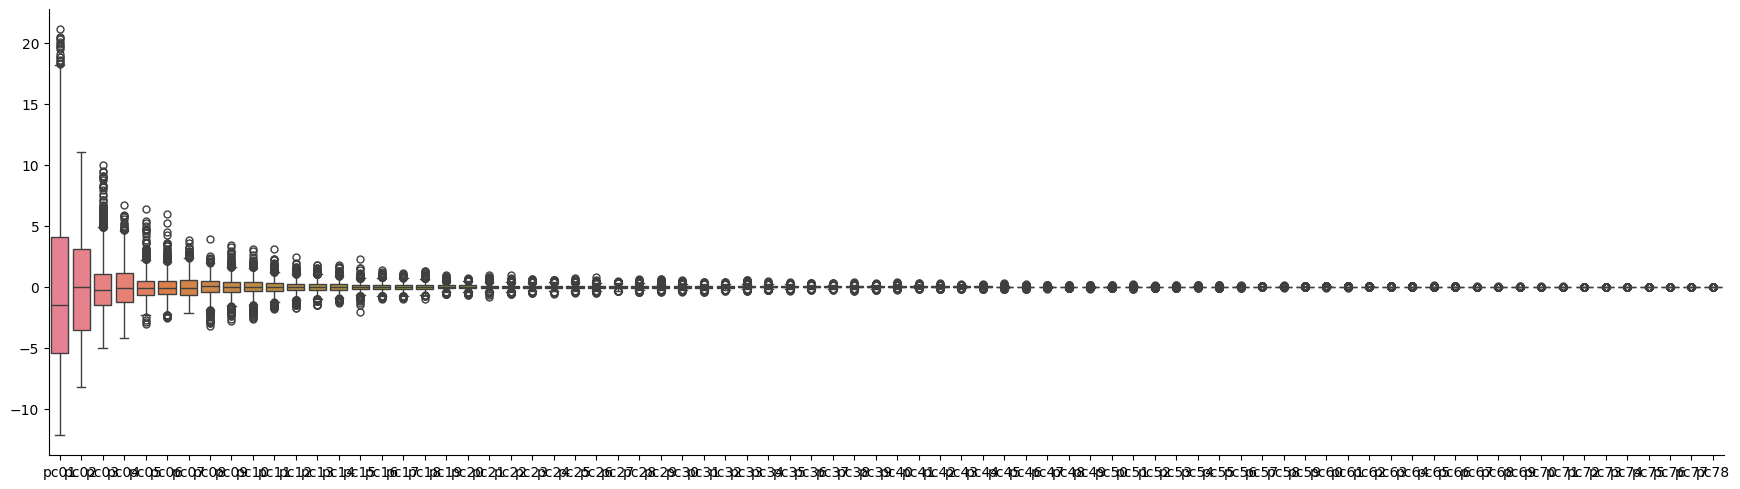

In [38]:
sns.catplot(data =df_pca_pc, kind ='box',aspect=3.5)
plt.show()

In [39]:
# Summary statistics
df_pca_pc.describe().round(3)

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
count  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000  2000.000   
mean      0.000    -0.000    -0.000     0.000     0.000     0.000    -0.000   
std       6.949     4.097     2.105     1.702     1.010     0.915     0.894   
min     -12.152    -8.243    -5.025    -4.213    -3.053    -2.549    -2.153   
25%      -5.402    -3.556    -1.477    -1.255    -0.682    -0.586    -0.638   
50%      -1.488     0.008    -0.266    -0.099    -0.110    -0.064    -0.099   
75%       4.072     3.085     1.063     1.094     0.488     0.489     0.550   
max      21.111    11.024     9.974     6.732     6.412     5.988     3.844   

           pc08      pc09      pc10  ...      pc69      pc70      pc71  \
count  2000.000  2000.000  2000.000  ...  2000.000  2000.000  2000.000   
mean      0.000    -0.000    -0.000  ...     0.000     0.000     0.000   
std       0.790     0.691     0.642  ...     0.003     0.002     0.002   
min      -3.199    -2.836    -2.618  ...    -0.016    -0.011    -0.019   
25%      -0.465    -0.398    -0.360  ...    -0.001    -0.001    -0.001   
50%       0.025     0.012     0.006  ...    -0.000     0.000     0.000   
75%       0.505     0.407     0.411  ...     0.001     0.001     0.001   
max       3.910     3.417     3.090  ...     0.025     0.023     0.022   

           pc72      pc73      pc74      pc75      pc76    pc77    pc78  
count  2000.000  2000.000  2000.000  2000.000  2000.000  2000.0  2000.0  
mean     -0.000    -0.000    -0.000     0.000    -0.000    -0.0     0.0  
std       0.001     0.001     0.001     0.000     0.000     0.0     0.0  
min      -0.008    -0.009    -0.004    -0.004    -0.002    -0.0    -0.0  
25%      -0.000    -0.000    -0.000    -0.000    -0.000    -0.0    -0.0  
50%      -0.000     0.000     0.000     0.000     0.000    -0.0    -0.0  
75%       0.000     0.000     0.000     0.000     0.000     0.0     0.0  
max       0.009     0.010     0.004     0.005     0.003     0.0     0.0  

[8 rows x 78 columns]

In [40]:
# Visualize the standard deviation
df_pca_pc.describe().loc['std']

pc01    6.948734
pc02    4.096624
pc03    2.104534
pc04    1.702240
pc05    1.010189
          ...   
pc74    0.000600
pc75    0.000496
pc76    0.000303
pc77    0.000026
pc78    0.000005
Name: std, Length: 78, dtype: float64

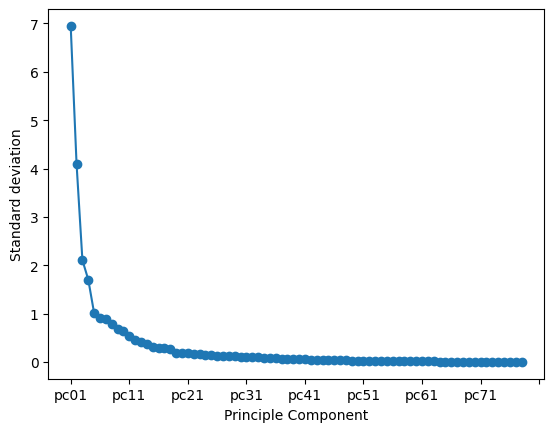

In [41]:
# show the standard deviation vs the PC number
fig, ax =plt.subplots()
df_pca_pc.describe().loc['std'].plot(ax=ax,marker='o' )
ax.set_xlabel('Principle Component')
ax.set_ylabel('Standard deviation')

plt.show()

In [42]:
pca=PCA(n_components=6)
pca_cor =pca.fit_transform(Xfeature_trans)
print("The variance explained by the two first principal components is: ", sum(pca.explained_variance_ratio_))

The variance explained by the two first principal components is:  0.9514670820698903


According to the PCA results and the graph, we can that the first 6 pcs can explain 95% of the variance. So we will use the first 6 pcs to further study the system.

In [43]:
df_pca_pc['corrosion'] =df.corrosion

In [44]:
df_pca_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 79 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pc01       2000 non-null   float64
 1   pc02       2000 non-null   float64
 2   pc03       2000 non-null   float64
 3   pc04       2000 non-null   float64
 4   pc05       2000 non-null   float64
 5   pc06       2000 non-null   float64
 6   pc07       2000 non-null   float64
 7   pc08       2000 non-null   float64
 8   pc09       2000 non-null   float64
 9   pc10       2000 non-null   float64
 10  pc11       2000 non-null   float64
 11  pc12       2000 non-null   float64
 12  pc13       2000 non-null   float64
 13  pc14       2000 non-null   float64
 14  pc15       2000 non-null   float64
 15  pc16       2000 non-null   float64
 16  pc17       2000 non-null   float64
 17  pc18       2000 non-null   float64
 18  pc19       2000 non-null   float64
 19  pc20       2000 non-null   float64
 20  pc21    

## Do the pca with the original data

In [45]:
df_copy=df.copy()

In [46]:
df_copy_standardize =StandardScaler().fit_transform(df_copy.select_dtypes('number').copy())

In [47]:
df_pca_original=PCA().fit_transform(df_copy_standardize)

In [48]:
df_pca_original

array([[ 1.35089690e+01, -1.94418734e+00,  1.11558424e+00, ...,
         1.32513716e-02, -4.51892000e-05, -5.42149351e-04],
       [ 1.55650980e+00,  2.90357736e+00, -7.19988645e-01, ...,
        -1.25924746e-03, -1.52175770e-04, -1.05176628e-04],
       [-2.40182121e+00,  5.75564586e+00,  4.62058244e-02, ...,
        -4.03051762e-04, -7.09449500e-05,  7.95181306e-05],
       ...,
       [-2.30263064e+00, -2.66345263e+00,  1.34177871e+00, ...,
        -1.39660702e-03, -8.95358466e-05, -3.09231350e-04],
       [ 6.27071866e-01, -2.16413285e+00, -3.54160715e+00, ...,
        -8.41639537e-04,  1.32713368e-04, -6.91215809e-05],
       [-4.48090500e+00, -6.56799670e-01, -1.68763113e-01, ...,
        -1.26431644e-04,  2.58805995e-04,  1.42730485e-04]])

In [49]:
df_pca_original=pd.DataFrame(df_pca_original,
                       columns=['pc%02d' % d for d in range(1,df_pca.shape[1]+1)])

In [50]:
df_pca_original['corrosion'] =df.corrosion

In [51]:
df_pca_original['y'] =np.where(df.corrosion=='yes',1,0)

# Part iv) Fitting and Interpretation

In [52]:
import statsmodels.formula.api as smf

In [53]:
df_copy=df.copy()

In [54]:
df_copy_standardize =StandardScaler().fit_transform(df_copy.select_dtypes('number').copy())

In [55]:
df_copy_standardize

array([[-1.33672725, -1.34927821, -1.24846582, ..., -1.19014616,
         2.73866916, -0.37678173],
       [ 0.29903838,  0.82352531,  1.01274255, ...,  0.44737198,
         0.15114181,  0.33339657],
       [ 1.11212679,  1.70032566,  1.7502225 , ...,  2.14885952,
        -0.59665625,  0.01068019],
       ...,
       [-0.91846339, -0.58879136, -0.46222954, ..., -0.79566367,
        -0.35704674, -0.32953313],
       [-0.10745874, -0.71688597, -0.97493029, ..., -0.75929187,
        -0.38423677, -0.38411663],
       [-0.24865376,  0.16380813,  0.45198068, ..., -0.10316364,
        -0.87123291, -0.40812045]])

In [56]:
df_original_stan =pd.DataFrame(df_copy_standardize)

In [57]:
df_original_stan.columns=input_features

In [58]:
df_original_stan['corrosion'] =df.corrosion

In [59]:
df_original_stan['y'] =df['corrosion'].replace({'yes':1, 'no':0})

In [60]:
df_original_stan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X01        2000 non-null   float64
 1   X02        2000 non-null   float64
 2   X03        2000 non-null   float64
 3   X04        2000 non-null   float64
 4   X05        2000 non-null   float64
 5   X06        2000 non-null   float64
 6   X07        2000 non-null   float64
 7   X08        2000 non-null   float64
 8   X09        2000 non-null   float64
 9   X10        2000 non-null   float64
 10  X11        2000 non-null   float64
 11  X12        2000 non-null   float64
 12  X13        2000 non-null   float64
 13  X14        2000 non-null   float64
 14  X15        2000 non-null   float64
 15  X16        2000 non-null   float64
 16  X17        2000 non-null   float64
 17  X18        2000 non-null   float64
 18  X19        2000 non-null   float64
 19  X20        2000 non-null   float64
 20  X21     

In [61]:
#No INPUTS! Fit an INTERCEPT-ONLY or CONSTANT AVERAGE model.
fit_01=smf.logit(formula='y~ 1',data =df_original_stan).fit()

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1


In [62]:
fit_01.params

Intercept    0.0
dtype: float64

one coefficient were estimated

In [63]:
fit_01.bse

Intercept    0.044721
dtype: float64

In [64]:
fit_01.pvalues

Intercept    1.0
dtype: float64

According to the pvalues using commonly accepted threshholds, there are no coefficient is statistically significant.

In [65]:
fit_01.conf_int().\
rename(columns={0:'ci_lwr',1:'ci_upr'})

ci_lwr    ci_upr
Intercept -0.087652  0.087652

In [66]:
def my_coefplot(mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()


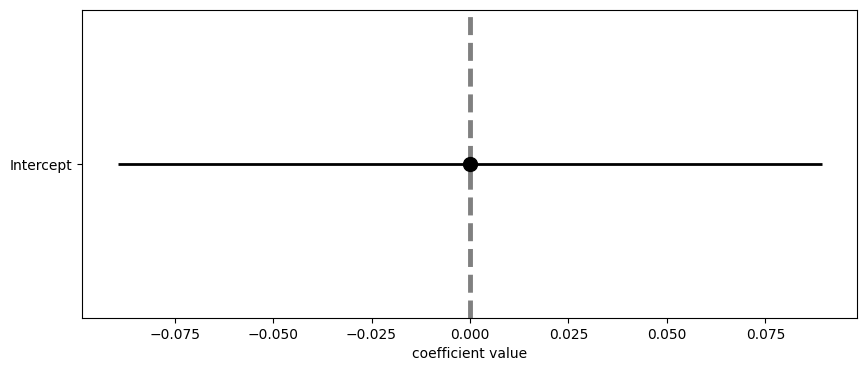

In [67]:
my_coefplot(fit_01)

The coefficient is not statistically significant since it passed through 0 point and it's hard to tell it is absolute positive or negative.

In [68]:
df_original_stan_copy=df_original_stan.copy()
df_original_stan_copy['pred_probability'] = fit_01.predict(df_original_stan)
df_original_stan_copy.head()

X01       X02       X03       X04       X05       X06       X07  \
0 -1.336727 -1.349278 -1.248466 -0.739933 -1.151191 -1.150319  0.061702   
1  0.299038  0.823525  1.012743 -0.516070 -0.123860 -0.020081  2.218355   
2  1.112127  1.700326  1.750222 -0.791821 -0.677111 -0.660891 -0.670137   
3 -1.436612 -1.233420 -1.077999 -0.695819 -1.062036 -1.081472  0.276155   
4  1.490264  0.515170  0.486400 -0.897915  0.204005  0.328143 -1.849226   

        X08       X09       X10  ...       X72       X73       X74       X75  \
0 -0.302786 -0.782889 -0.617853  ... -2.318673  2.664839 -1.150681  1.482018   
1 -2.521014 -2.618757  1.327357  ... -0.342119  0.105061  0.535497 -0.292677   
2 -0.998566 -1.127647  0.185361  ...  0.600344 -0.607315  1.958398 -0.609145   
3 -0.090881 -0.403102 -0.620363  ... -1.543104  1.460961 -1.134039  0.970534   
4  1.118327  1.170753  1.031627  ... -0.482834  0.228832  0.781245 -0.246411   

        X76       X77       X78  corrosion  y  pred_probability  
0 -1.190146  2.738669 -0.376782        yes  1               0.5  
1  0.447372  0.151142  0.333397         no  0               0.5  
2  2.148860 -0.596656  0.010680         no  0               0.5  
3 -1.166883  1.491952 -0.388669        yes  1               0.5  
4  0.707848  0.281901  0.492031         no  0               0.5  

[5 rows x 81 columns]

In [69]:
df_original_stan_copy['pred_class'] =np.where(df_original_stan_copy.pred_probability >0.5, 1, 0)

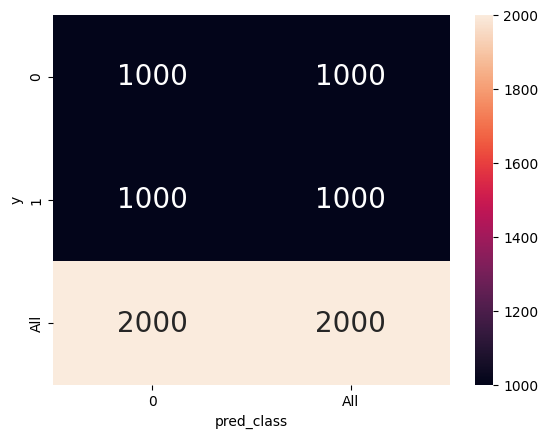

In [70]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( df_original_stan_copy.y, df_original_stan_copy.pred_class, margins=True ),
            annot=True, annot_kws={'size': 20}, fmt='3d')

plt.show()

In [71]:
#accuracy
np.mean(df_original_stan_copy.y==df_original_stan_copy.pred_class)

0.5

In [72]:
TN,FP,FN,TP =confusion_matrix(df_original_stan_copy.y.to_numpy(),df_original_stan_copy.pred_class.to_numpy()).ravel()

In [73]:
Accuracy =(TN+TP)/(TN+TP+FN+FP)
Accuracy

0.5

In [74]:
sensitivity = TP/(TP+FN)
sensitivity

0.0

In [75]:
specificity = TN/(FP+TN)
specificity

1.0

In [76]:
FPR = 1-specificity
FPR

0.0

In [77]:
fpr_01, tpr_01,threshold_01 = roc_curve(df_original_stan_copy.y.to_numpy(),df_original_stan_copy.pred_probability.to_numpy())

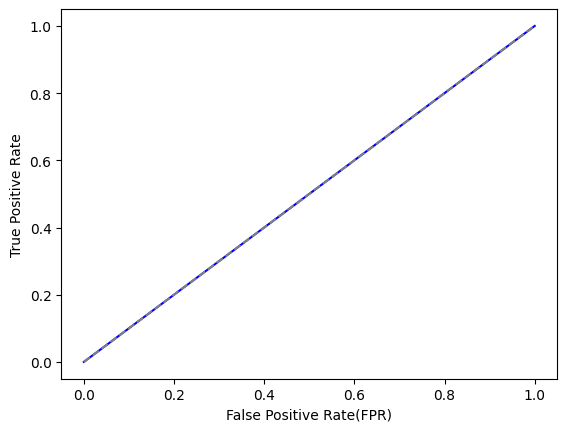

In [78]:
fig,ax=plt.subplots()
ax.plot(fpr_01,tpr_01,color='b')
ax.plot([0,1],[0,1],color='grey',linestyle='--')

ax.set_xlabel('False Positive Rate(FPR)')
ax.set_ylabel('True Positive Rate')

plt.show()

In [79]:
roc_auc_score(df_original_stan_copy.y.to_numpy(), df_original_stan_copy.pred_probability.to_numpy())

0.5

2. Linear additive features using the original inputs.

In [80]:
fit_02=smf.logit(formula='y~X01+X02+X03+X04+X05+X06+X07+X08+X09+X10+X11+X12+X13+X14+X15+X16+X17+X18+X19+X20+X21+X22+X23+X24+X25+X26+X27+X28+X29+X30+X31+X32+X33+X34+X35+X36+X37+X38+X39+X40+X41+X42+X43+X44+X45+X46+X47+X48+X49+X50+X51+X52+X53+X54+X55+X56+X57+X58+X59+X60+X61+X62+X63+X64+X65+X66+X67+X68+X69+X70+X71+X72+X73+X74+X75+X76+X77+X78',data =df_original_stan).fit()

/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

it crashes because of too many variables which means we need to use pca to reduce the correlated variables.

3. Linear additive features based on transformed inputs

In [81]:
df_tran_stan=pd.DataFrame(Xfeature_trans)

In [82]:
df_tran_stan.columns=input_features

In [83]:
df_tran_stan['corrosion'] =df.corrosion

In [84]:
df_tran_stan['y'] =np.where(df_tran_stan.corrosion=='yes', 1,0)

In [85]:
df_tran_stan

X01       X02       X03       X04       X05       X06       X07  \
0    -1.336727 -1.349278 -1.739344 -0.681169 -1.993770 -2.359979  0.061702   
1     0.299038  0.823525  0.950008 -0.304731  0.239629  0.366637  2.218355   
2     1.112127  1.700326  1.246389 -0.783872 -0.498849 -0.459721 -0.670137   
3    -1.436612 -1.233420 -1.123329 -0.599089 -1.540735 -1.821903  0.276155   
4     1.490264  0.515170  0.678992 -1.018833  0.531501  0.648477 -1.849226   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.305360  0.442430  0.526541  1.944273  2.014719  1.828087 -0.712751   
1996 -1.482908 -1.321354 -1.395589 -0.794129 -1.700439 -1.787072  0.230448   
1997 -0.918463 -0.588791 -0.071915  1.421672  1.563578  1.514460 -0.633378   
1998 -0.107459 -0.716886 -0.866249 -0.294961 -0.650182 -0.928332  1.171629   
1999 -0.248654  0.163808  0.658825  0.432572  0.285276  0.130086 -0.886719   

           X08       X09       X10  ...       X71       X72       X73  \
0    -0.302786 -0.782889 -0.961414  ... -2.003699 -2.533218  2.479531   
1    -2.521014 -2.618757  1.699727  ... -0.493462 -0.247753  0.202573   
2    -0.998566 -1.127647  0.577600  ...  0.542017  0.604756 -0.620650   
3    -0.090881 -0.403102 -0.968739  ... -1.465646 -1.535012  1.514145   
4     1.118327  1.170753  1.465040  ... -0.586386 -0.385603  0.334828   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.933802 -0.831228 -0.869253  ...  0.962677  0.857004 -0.854778   
1996 -0.009742 -0.175649 -0.780098  ... -1.551813 -1.629162  1.627564   
1997 -0.671098 -0.605095 -1.436445  ...  0.210045  0.318800 -0.290216   
1998  1.074258  1.355063  1.130717  ...  0.225278  0.350584 -0.359706   
1999 -1.234112 -0.777704  0.304562  ...  1.086620  0.949367 -0.945984   

           X74       X75       X76       X77       X78  corrosion  y  
0    -1.594285  1.730310 -1.793515  2.533083 -0.237453        yes  1  
1     0.707262 -0.244674  0.657280  0.247649  1.102485         no  0  
2     1.118127 -0.749134  1.124052 -0.604753  0.770704         no  0  
3    -1.430786  1.263995 -1.503290  1.534925 -0.314692        yes  1  
4     0.798010 -0.176554  0.753458  0.385482  1.219696         no  0  
...        ...       ...       ...       ...       ...        ... ..  
1995  0.598636 -0.742775  0.633906 -0.856967  0.127297        yes  1  
1996 -1.631028  1.507123 -1.708784  1.629116 -0.597830        yes  1  
1997 -0.263983  0.175678 -0.241174 -0.318806  0.002829        yes  1  
1998 -0.227342 -0.365064 -0.187843 -0.350606 -0.284036        yes  1  
1999  0.334191 -0.832002  0.392356 -0.949319 -0.464508        yes  1  

[2000 rows x 80 columns]

In [86]:
fit_03=smf.logit(formula='y~X01+X02+X03+X04+X05+X06+X07+X08+X09+X10+X11+X12+X13+X14+X15+X16+X17+X18+X19+X20+X21+X22+X23+X24+X25+X26+X27+X28+X29+X30+X31+X32+X33+X34+X35+X36+X37+X38+X39+X40+X41+X42+X43+X44+X45+X46+X47+X48+X49+X50+X51+X52+X53+X54+X55+X56+X57+X58+X59+X60+X61+X62+X63+X64+X65+X66+X67+X68+X69+X70+X71+X72+X73+X74+X75+X76+X77+X78',data =df_tran_stan).fit()

         Current function value: inf
         Iterations: 35


/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

4.Apply PCA to the original inputs and create linear additive features from the pcs

In [87]:
df_pca_pc['y'] =np.where(df_pca_pc.corrosion=='yes',1,0)

In [88]:
fit_04=smf.logit(formula='y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09+pc10+pc11+pc12+pc13+pc14+pc15+pc16+pc17', data =df_pca_original).fit()

Optimization terminated successfully.
         Current function value: 0.146712
         Iterations 13


In [89]:
fit_04.params

Intercept    14.891171
pc01          4.178218
pc02         -8.372964
pc03         10.501687
pc04         -2.953636
pc05         10.359617
pc06          8.835561
pc07          1.578310
pc08         -1.729263
pc09         -2.030605
pc10         -0.878468
pc11          1.298480
pc12         -0.347944
pc13          0.983674
pc14         -0.265795
pc15         -0.934731
pc16         -2.174042
pc17          0.213421
dtype: float64

There are 18 coefficients estimated.

In [90]:
fit_04.pvalues<0.05

Intercept     True
pc01          True
pc02          True
pc03          True
pc04          True
pc05          True
pc06          True
pc07         False
pc08          True
pc09          True
pc10          True
pc11          True
pc12         False
pc13          True
pc14         False
pc15         False
pc16          True
pc17         False
dtype: bool

15 coefficients are statistically significant using commonly accepted threshholds

In [91]:
fit_04.conf_int().\
    rename(columns={0:'ci_lwr',1:'ci_upr'})


ci_lwr     ci_upr
Intercept  10.537539  19.244803
pc01        3.121838   5.234599
pc02       -9.764880  -6.981048
pc03        8.183126  12.820248
pc04       -3.511597  -2.395675
pc05        8.572188  12.147046
pc06        6.797573  10.873549
pc07       -0.351262   3.507883
pc08       -2.328183  -1.130343
pc09       -2.985746  -1.075464
pc10       -1.419736  -0.337200
pc11        0.463507   2.133453
pc12       -1.397060   0.701171
pc13        0.288619   1.678729
pc14       -0.964077   0.432486
pc15       -1.877499   0.008037
pc16       -3.138434  -1.209650
pc17       -0.506567   0.933409

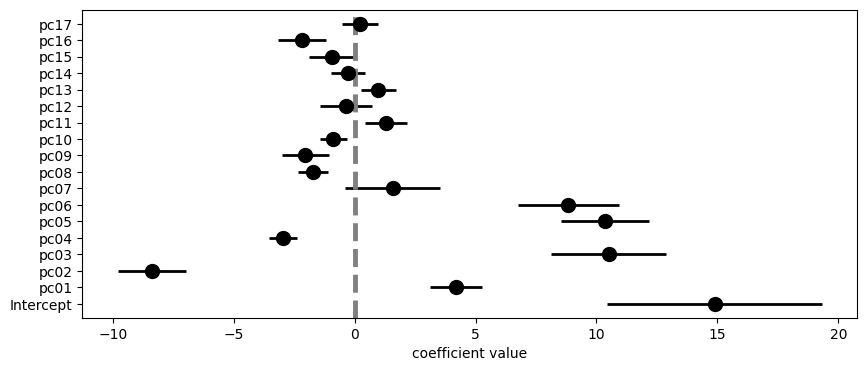

In [92]:
my_coefplot(fit_04)

In [93]:
np.abs(fit_04.params).sort_values()

pc17          0.213421
pc14          0.265795
pc12          0.347944
pc10          0.878468
pc15          0.934731
pc13          0.983674
pc11          1.298480
pc07          1.578310
pc08          1.729263
pc09          2.030605
pc16          2.174042
pc04          2.953636
pc01          4.178218
pc02          8.372964
pc06          8.835561
pc05         10.359617
pc03         10.501687
Intercept    14.891171
dtype: float64

The two statisticaly significant coefficients having the highest Magnitude are pc03 and pc05

In [94]:
df_pca_original_copy=df_pca_original.copy()
df_pca_original_copy['pred_probability'] = fit_04.predict(df_pca_original)
df_pca_original_copy.head()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0  13.508969 -1.944187  1.115584 -0.060639 -3.071397 -0.127495 -1.996138   
1   1.556510  2.903577 -0.719989 -0.881265 -0.007649  0.406473  0.340541   
2  -2.401821  5.755646  0.046206 -2.430975  3.073463  0.058897  0.462718   
3   8.736780 -2.383300 -0.630680 -1.128191 -1.446937 -0.853979 -1.139741   
4   0.248621  3.276555 -1.355350  1.022715 -0.267379  2.278812 -1.466736   

       pc08      pc09      pc10  ...      pc72      pc73      pc74      pc75  \
0  1.399899  0.421148  0.351626  ...  0.004083 -0.008586 -0.006671 -0.006216   
1  1.111274  3.746116  0.836550  ... -0.004964 -0.001903  0.000996  0.000012   
2  0.475626  0.382981 -0.640688  ...  0.007196  0.002718  0.000401 -0.001643   
3  1.259811  0.290499 -0.248950  ... -0.001850  0.005920  0.004481  0.004305   
4 -0.486371 -1.507443  0.726502  ...  0.005701  0.000786 -0.002138  0.002318   

       pc76      pc77      pc78  corrosion  y  pred_probability  
0  0.013251 -0.000045 -0.000542        yes  1          1.000000  
1 -0.001259 -0.000152 -0.000105         no  0          0.000006  
2 -0.000403 -0.000071  0.000080         no  0          0.034560  
3 -0.001953  0.000130 -0.000115        yes  1          1.000000  
4  0.000077 -0.000109  0.000100         no  0          0.000597  

[5 rows x 81 columns]

In [95]:
df_pca_original_copy['pred_class'] =np.where(df_pca_original_copy.pred_probability >0.5, 1, 0)

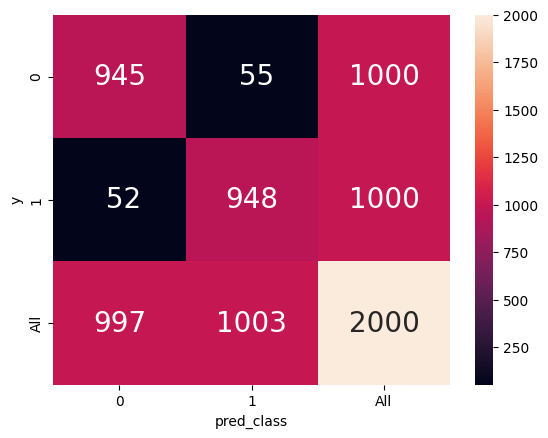

In [96]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( df_pca_original_copy.y, df_pca_original_copy.pred_class, margins=True ),
            annot=True, annot_kws={'size': 20}, fmt='3d')

plt.show()

In [97]:
# calculate the accuracy
np.mean(df_pca_original_copy.y==df_pca_original_copy.pred_class)

0.9465

In [98]:
TN,FP,FN,TP =confusion_matrix(df_pca_original_copy.y.to_numpy(),df_pca_original_copy.pred_class.to_numpy()).ravel()

In [99]:
Accuracy=(TN+TP)/(TN+TP+FN+FP)
Accuracy

0.9465

In [100]:
sensitivity = TP/(TP+FN)
sensitivity

0.948

In [101]:
specificity = TN/(FP+TN)
specificity

0.945

In [102]:
FPR=1-specificity
FPR

0.05500000000000005

In [103]:
fpr_04, tpr_04,threshold_04 = roc_curve(df_pca_original_copy.y.to_numpy(),df_pca_original_copy.pred_probability.to_numpy())

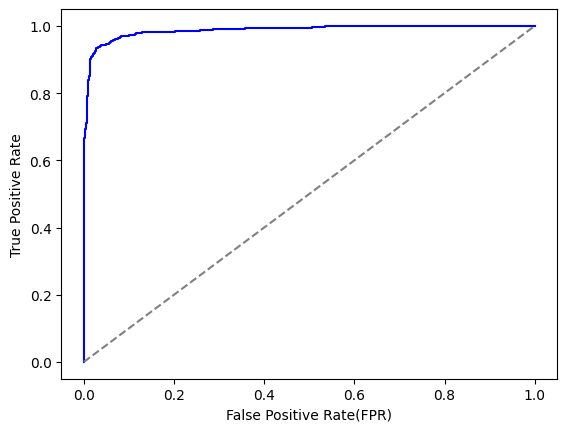

In [104]:
fig,ax=plt.subplots()
ax.plot(fpr_04,tpr_04,color='b')
ax.plot([0,1],[0,1],color='grey',linestyle='--')

ax.set_xlabel('False Positive Rate(FPR)')
ax.set_ylabel('True Positive Rate')

plt.show()

In [105]:
roc_auc_score(df_pca_original_copy.y.to_numpy(), df_pca_original_copy.pred_probability.to_numpy())

0.987164

5.Apply PCA to the transformed inputs and create linear additive features from the pcs

In [106]:
fit_05=smf.logit(formula='y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09+pc10+pc11+pc12+pc13+pc14+pc15+pc16+pc17', data =df_pca_pc).fit()

Optimization terminated successfully.
         Current function value: 0.126131
         Iterations 12


In [107]:
fit_05.params

Intercept    6.274807
pc01         1.253064
pc02        -2.956842
pc03        -0.323778
pc04        -0.927841
pc05        -0.347361
pc06         2.403800
pc07         2.228324
pc08         0.527670
pc09         0.291835
pc10         0.598746
pc11         3.427540
pc12         8.651771
pc13        -0.434154
pc14         7.207641
pc15         4.890961
pc16        -0.594211
pc17         1.239962
dtype: float64

There are 18 coefficients

In [108]:
fit_05.pvalues<0.05

Intercept     True
pc01          True
pc02          True
pc03          True
pc04          True
pc05          True
pc06          True
pc07          True
pc08          True
pc09         False
pc10          True
pc11          True
pc12          True
pc13         False
pc14          True
pc15          True
pc16         False
pc17          True
dtype: bool

15 coefficients are statistically significant using commonly accepted threshhold

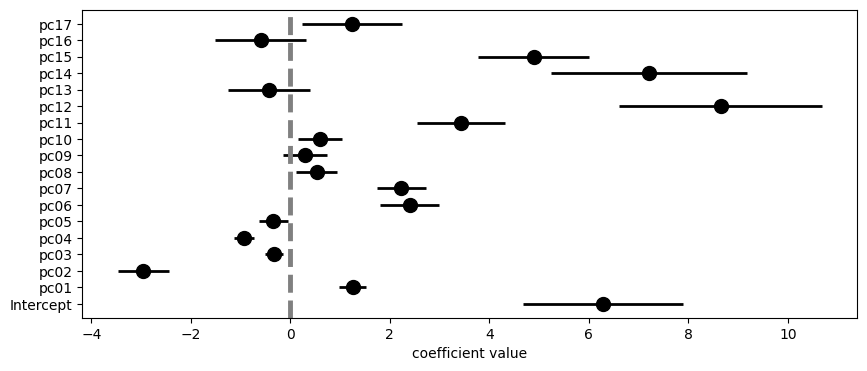

In [109]:
my_coefplot(fit_05)

except the coefficients of pc09, pc13 and pc 16, all the other coefficents are statistically significant. Coefficient of pc02,pc03,pc04,pc05 are negative features and the others are positive features

In [110]:
np.abs(fit_05.params).sort_values(ascending=False)

pc12         8.651771
pc14         7.207641
Intercept    6.274807
pc15         4.890961
pc11         3.427540
pc02         2.956842
pc06         2.403800
pc07         2.228324
pc01         1.253064
pc17         1.239962
pc04         0.927841
pc10         0.598746
pc16         0.594211
pc08         0.527670
pc13         0.434154
pc05         0.347361
pc03         0.323778
pc09         0.291835
dtype: float64

p12 and pc14 has the highest magnitude coefficient values.

In [111]:
df_pca_pc_copy=df_pca_pc.copy()
df_pca_pc_copy['pred_probability'] = fit_05.predict(df_pca_pc)
df_pca_pc_copy.head()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0  15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1   1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2  -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3  11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4  -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   

       pc08      pc09      pc10  ...      pc72      pc73      pc74      pc75  \
0 -1.666939 -0.344578  0.005292  ... -0.000566 -0.000240 -0.001079  0.000979   
1  0.343681 -0.172044 -1.702956  ... -0.000790  0.000121  0.000560 -0.000023   
2 -0.469571  0.202670 -0.063525  ... -0.000367  0.000048 -0.000068  0.000072   
3 -0.438922 -0.477582  0.490047  ...  0.002393  0.000767  0.000058 -0.000909   
4  0.033279  1.666200 -0.275579  ...  0.000257 -0.000211 -0.000113 -0.000209   

       pc76      pc77          pc78  corrosion  y  pred_probability  
0  0.000008  0.000064  3.507294e-06        yes  1          1.000000  
1  0.000095 -0.000016 -1.877016e-06         no  0          0.010887  
2  0.000090  0.000014  4.904500e-07         no  0          0.132538  
3  0.000297  0.000023 -9.526207e-07        yes  1          1.000000  
4  0.000076  0.000007  2.993971e-06         no  0          0.056450  

[5 rows x 81 columns]

In [112]:
df_pca_pc_copy['pred_class'] =np.where(df_pca_pc_copy.pred_probability >0.5, 1, 0)
df_pca_pc_copy.head()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0  15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1   1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2  -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3  11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4  -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   

       pc08      pc09      pc10  ...      pc73      pc74      pc75      pc76  \
0 -1.666939 -0.344578  0.005292  ... -0.000240 -0.001079  0.000979  0.000008   
1  0.343681 -0.172044 -1.702956  ...  0.000121  0.000560 -0.000023  0.000095   
2 -0.469571  0.202670 -0.063525  ...  0.000048 -0.000068  0.000072  0.000090   
3 -0.438922 -0.477582  0.490047  ...  0.000767  0.000058 -0.000909  0.000297   
4  0.033279  1.666200 -0.275579  ... -0.000211 -0.000113 -0.000209  0.000076   

       pc77          pc78  corrosion  y  pred_probability  pred_class  
0  0.000064  3.507294e-06        yes  1          1.000000           1  
1 -0.000016 -1.877016e-06         no  0          0.010887           0  
2  0.000014  4.904500e-07         no  0          0.132538           0  
3  0.000023 -9.526207e-07        yes  1          1.000000           1  
4  0.000007  2.993971e-06         no  0          0.056450           0  

[5 rows x 82 columns]

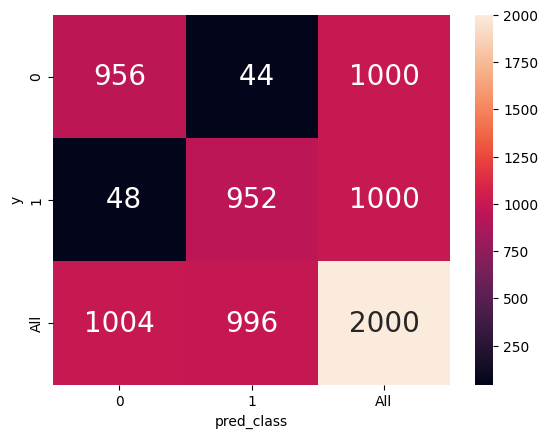

In [113]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( df_pca_pc_copy.y, df_pca_pc_copy.pred_class, margins=True ),
            annot=True, annot_kws={'size': 20}, fmt='3d')

plt.show()

In [114]:
# calculate the accuracy
np.mean(df_pca_pc_copy.y==df_pca_pc_copy.pred_class)

0.954

In [115]:
## Caculate accuracy
TN,FP,FN,TP =confusion_matrix(df_pca_pc_copy.y.to_numpy(),df_pca_pc_copy.pred_class.to_numpy()).ravel()

In [116]:
Accuracy=(TN+TP)/(TN+TP+FN+FP)
Accuracy

0.954

In [117]:
sensitivity = TP/(TP+FN)
sensitivity

0.952

In [118]:
specificity = TN/(FP+TN)
specificity

0.956

In [119]:
FPR = 1-specificity
FPR

0.04400000000000004

In [120]:
fpr_05, tpr_05,threshold_05 = roc_curve(df_pca_pc_copy.y.to_numpy(),df_pca_pc_copy.pred_probability.to_numpy())

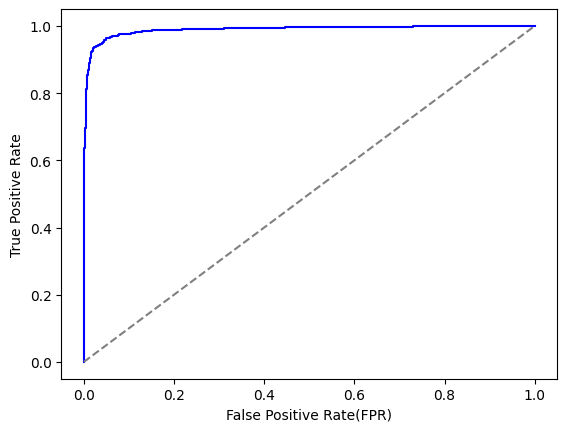

In [121]:
fig,ax=plt.subplots()
ax.plot(fpr_05,tpr_05,color='b')
ax.plot([0,1],[0,1],color='grey',linestyle='--')

ax.set_xlabel('False Positive Rate(FPR)')
ax.set_ylabel('True Positive Rate')

plt.show()

In [122]:
roc_auc_score(df_pca_pc_copy.y.to_numpy(), df_pca_pc_copy.pred_probability.to_numpy())

0.9893369999999999

6. Apply PCA to the original inputs and create all pairwise interactions between the PCs.

In [123]:
fit_06=smf.logit(formula='y~(pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09+pc10+pc11+pc12+pc13+pc14+pc15+pc16+pc17)**2', data =df_pca_original).fit()

         Current function value: inf
         Iterations: 35


/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

7. Apply PCA to the transformed inputs and create all pairwise interactions between the PCs.

In [124]:
fit_07=smf.logit(formula='y~(y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09+pc10+pc11+pc12+pc13+pc14+pc15+pc16+pc17)**2', data =df_pca_pc).fit()

PatsyError: ~ can only be used once, and only at the top level
    y~(y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09+pc10+pc11+pc12+pc13+pc14+pc15+pc16+pc17)**2
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

8. additional models

In [125]:
fit_08=smf.logit(formula='y~(pc01+pc02+pc03+pc04+pc05+pc06)**2', data =df_pca_pc).fit()

Optimization terminated successfully.
         Current function value: 0.138431
         Iterations 11


In [126]:
fit_08.params

Intercept    0.031282
pc01         0.346644
pc02        -1.670413
pc03         0.064861
pc04        -0.205987
pc05        -0.689351
pc06         0.183260
pc01:pc02   -0.054878
pc01:pc03   -0.044520
pc01:pc04    0.001213
pc01:pc05    0.195147
pc01:pc06   -0.115996
pc02:pc03   -0.058472
pc02:pc04   -0.188292
pc02:pc05   -0.136725
pc02:pc06    0.441607
pc03:pc04   -0.260233
pc03:pc05   -0.010380
pc03:pc06   -0.484081
pc04:pc05    0.664655
pc04:pc06   -0.219764
pc05:pc06    0.192730
dtype: float64

There are 22 coefficients.

In [127]:
fit_08.pvalues<0.05

Intercept    False
pc01          True
pc02          True
pc03         False
pc04         False
pc05          True
pc06         False
pc01:pc02     True
pc01:pc03     True
pc01:pc04    False
pc01:pc05     True
pc01:pc06     True
pc02:pc03    False
pc02:pc04     True
pc02:pc05    False
pc02:pc06     True
pc03:pc04     True
pc03:pc05    False
pc03:pc06     True
pc04:pc05     True
pc04:pc06     True
pc05:pc06    False
dtype: bool

13 coefficients (and thus features) are STATISTICALLY SIGNIFICANT
using commonly accepted thresholds?

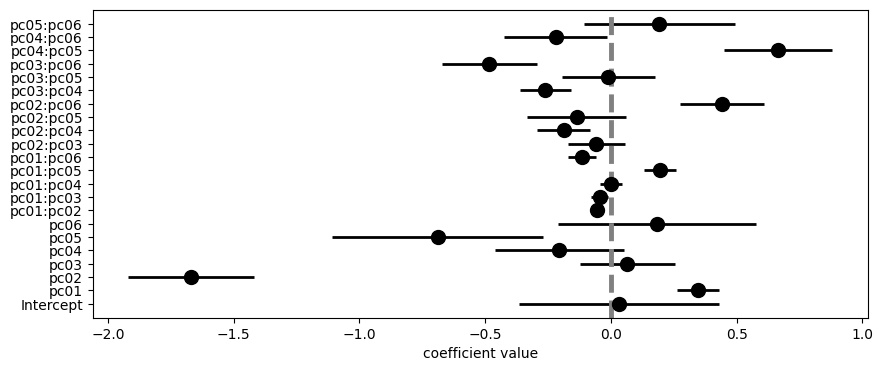

In [128]:
my_coefplot(fit_08)

pc01,pc02,pc05,pc01:pc02 ,pc01:pc03,pc01:pc05,pc01:pc06,pc02:pc04,pc02:pc06,pc03:pc04,pc03:pc06,pc04:pc05,pc04:pc06 are statistically significant.pc02,pc01:pc05,pc02,pc06,pc04:pc06 are positive and others are negative. 

In [129]:
np.abs(fit_08.params).sort_values(ascending=False)

pc02         1.670413
pc05         0.689351
pc04:pc05    0.664655
pc03:pc06    0.484081
pc02:pc06    0.441607
pc01         0.346644
pc03:pc04    0.260233
pc04:pc06    0.219764
pc04         0.205987
pc01:pc05    0.195147
pc05:pc06    0.192730
pc02:pc04    0.188292
pc06         0.183260
pc02:pc05    0.136725
pc01:pc06    0.115996
pc03         0.064861
pc02:pc03    0.058472
pc01:pc02    0.054878
pc01:pc03    0.044520
Intercept    0.031282
pc03:pc05    0.010380
pc01:pc04    0.001213
dtype: float64

so pc02 and pc05 have the highest Maginitude coefficient values

In [130]:
df_pca_pc_copy=df_pca_pc.copy()
df_pca_pc_copy['pred_probability'] = fit_08.predict(df_pca_pc)
df_pca_pc_copy.head()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0  15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1   1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2  -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3  11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4  -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   

       pc08      pc09      pc10  ...      pc72      pc73      pc74      pc75  \
0 -1.666939 -0.344578  0.005292  ... -0.000566 -0.000240 -0.001079  0.000979   
1  0.343681 -0.172044 -1.702956  ... -0.000790  0.000121  0.000560 -0.000023   
2 -0.469571  0.202670 -0.063525  ... -0.000367  0.000048 -0.000068  0.000072   
3 -0.438922 -0.477582  0.490047  ...  0.002393  0.000767  0.000058 -0.000909   
4  0.033279  1.666200 -0.275579  ...  0.000257 -0.000211 -0.000113 -0.000209   

       pc76      pc77          pc78  corrosion  y  pred_probability  
0  0.000008  0.000064  3.507294e-06        yes  1          0.999991  
1  0.000095 -0.000016 -1.877016e-06         no  0          0.000059  
2  0.000090  0.000014  4.904500e-07         no  0          0.009004  
3  0.000297  0.000023 -9.526207e-07        yes  1          0.999934  
4  0.000076  0.000007  2.993971e-06         no  0          0.000003  

[5 rows x 81 columns]

In [131]:
df_pca_pc_copy['pred_class'] =np.where(df_pca_pc_copy.pred_probability >0.5, 1, 0)
df_pca_pc_copy.head()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0  15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1   1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2  -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3  11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4  -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   

       pc08      pc09      pc10  ...      pc73      pc74      pc75      pc76  \
0 -1.666939 -0.344578  0.005292  ... -0.000240 -0.001079  0.000979  0.000008   
1  0.343681 -0.172044 -1.702956  ...  0.000121  0.000560 -0.000023  0.000095   
2 -0.469571  0.202670 -0.063525  ...  0.000048 -0.000068  0.000072  0.000090   
3 -0.438922 -0.477582  0.490047  ...  0.000767  0.000058 -0.000909  0.000297   
4  0.033279  1.666200 -0.275579  ... -0.000211 -0.000113 -0.000209  0.000076   

       pc77          pc78  corrosion  y  pred_probability  pred_class  
0  0.000064  3.507294e-06        yes  1          0.999991           1  
1 -0.000016 -1.877016e-06         no  0          0.000059           0  
2  0.000014  4.904500e-07         no  0          0.009004           0  
3  0.000023 -9.526207e-07        yes  1          0.999934           1  
4  0.000007  2.993971e-06         no  0          0.000003           0  

[5 rows x 82 columns]

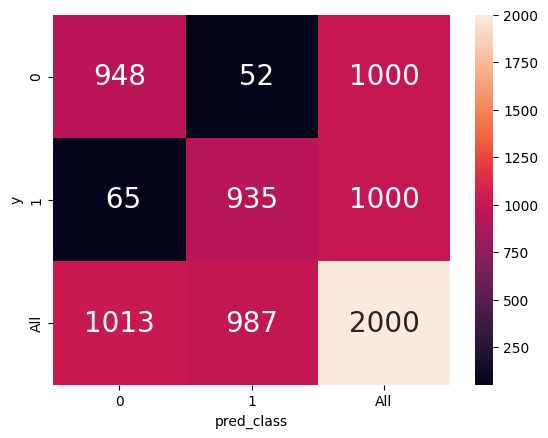

In [132]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( df_pca_pc_copy.y, df_pca_pc_copy.pred_class, margins=True ),
            annot=True, annot_kws={'size': 20}, fmt='3d')

plt.show()


In [133]:
# calculate the accuracy
np.mean(df_pca_pc_copy.y==df_pca_pc_copy.pred_class)

0.9415

In [134]:
## Caculate accuracy
TN,FP,FN,TP =confusion_matrix(df_pca_pc_copy.y.to_numpy(),df_pca_pc_copy.pred_class.to_numpy()).ravel()

In [135]:
Accuracy=(TN+TP)/(TN+TP+FN+FP)
Accuracy

0.9415

In [136]:
sensitivity = TP/(TP+FN)
sensitivity

0.935

In [137]:
specificity = TN/(FP+TN)
specificity

0.948

In [138]:
FPR = 1-specificity
FPR

0.052000000000000046

In [139]:
fpr_08, tpr_08,threshold_08 = roc_curve(df_pca_pc_copy.y.to_numpy(),df_pca_pc_copy.pred_probability.to_numpy())

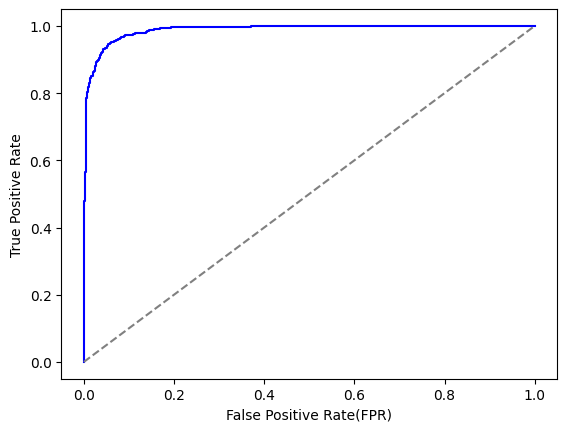

In [140]:
fig,ax=plt.subplots()
ax.plot(fpr_08,tpr_08,color='b')
ax.plot([0,1],[0,1],color='grey',linestyle='--')

ax.set_xlabel('False Positive Rate(FPR)')
ax.set_ylabel('True Positive Rate')

plt.show()

In [141]:
roc_auc_score(df_pca_pc_copy.y.to_numpy(), df_pca_pc_copy.pred_probability.to_numpy())

0.98847

In [142]:
fit_09=smf.logit(formula='y~pc01+pc02+pc03+pc04+pc05+pc06', data =df_pca_pc).fit()

Optimization terminated successfully.
         Current function value: 0.205432
         Iterations 9


In [143]:
fit_09.params

Intercept    0.184837
pc01         0.133160
pc02        -1.173103
pc03         0.251274
pc04        -0.490492
pc05        -0.660393
pc06         0.371944
dtype: float64

There are 7 parameters

In [144]:
fit_09.pvalues<0.05

Intercept    False
pc01          True
pc02          True
pc03          True
pc04          True
pc05          True
pc06          True
dtype: bool

6 coefficients are important.

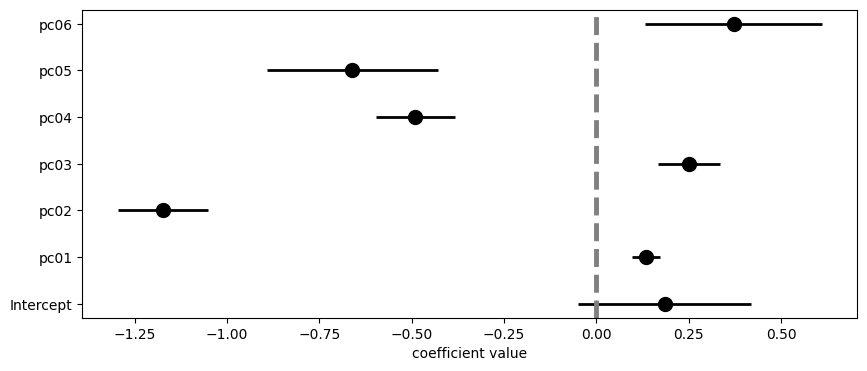

In [145]:
my_coefplot(fit_09)

all the coefficients except the intercept are statistically significant.pc02,pc04 and pc 05 are negative others are positive.

In [146]:
np.abs(fit_09.params).sort_values(ascending=False)

pc02         1.173103
pc05         0.660393
pc04         0.490492
pc06         0.371944
pc03         0.251274
Intercept    0.184837
pc01         0.133160
dtype: float64

pc02 and pc05 are the two with the highest magnitude.

In [147]:
df_pca_pc_copy=df_pca_pc.copy()
df_pca_pc_copy['pred_probability'] = fit_09.predict(df_pca_pc)
df_pca_pc_copy.head()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0  15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1   1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2  -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3  11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4  -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   

       pc08      pc09      pc10  ...      pc72      pc73      pc74      pc75  \
0 -1.666939 -0.344578  0.005292  ... -0.000566 -0.000240 -0.001079  0.000979   
1  0.343681 -0.172044 -1.702956  ... -0.000790  0.000121  0.000560 -0.000023   
2 -0.469571  0.202670 -0.063525  ... -0.000367  0.000048 -0.000068  0.000072   
3 -0.438922 -0.477582  0.490047  ...  0.002393  0.000767  0.000058 -0.000909   
4  0.033279  1.666200 -0.275579  ...  0.000257 -0.000211 -0.000113 -0.000209   

       pc76      pc77          pc78  corrosion  y  pred_probability  
0  0.000008  0.000064  3.507294e-06        yes  1          0.943936  
1  0.000095 -0.000016 -1.877016e-06         no  0          0.000916  
2  0.000090  0.000014  4.904500e-07         no  0          0.014404  
3  0.000297  0.000023 -9.526207e-07        yes  1          0.985047  
4  0.000076  0.000007  2.993971e-06         no  0          0.005681  

[5 rows x 81 columns]

In [148]:
df_pca_pc_copy['pred_class'] =np.where(df_pca_pc_copy.pred_probability >0.5, 1, 0)
df_pca_pc_copy.head()

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0  15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1   1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2  -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3  11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4  -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   

       pc08      pc09      pc10  ...      pc73      pc74      pc75      pc76  \
0 -1.666939 -0.344578  0.005292  ... -0.000240 -0.001079  0.000979  0.000008   
1  0.343681 -0.172044 -1.702956  ...  0.000121  0.000560 -0.000023  0.000095   
2 -0.469571  0.202670 -0.063525  ...  0.000048 -0.000068  0.000072  0.000090   
3 -0.438922 -0.477582  0.490047  ...  0.000767  0.000058 -0.000909  0.000297   
4  0.033279  1.666200 -0.275579  ... -0.000211 -0.000113 -0.000209  0.000076   

       pc77          pc78  corrosion  y  pred_probability  pred_class  
0  0.000064  3.507294e-06        yes  1          0.943936           1  
1 -0.000016 -1.877016e-06         no  0          0.000916           0  
2  0.000014  4.904500e-07         no  0          0.014404           0  
3  0.000023 -9.526207e-07        yes  1          0.985047           1  
4  0.000007  2.993971e-06         no  0          0.005681           0  

[5 rows x 82 columns]

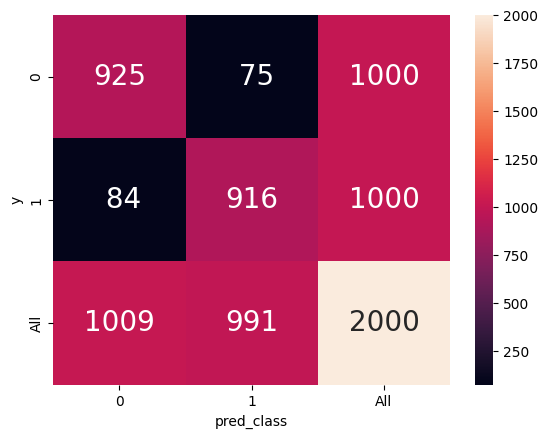

In [149]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( df_pca_pc_copy.y, df_pca_pc_copy.pred_class, margins=True ),
            annot=True, annot_kws={'size': 20}, fmt='3d')

plt.show()

In [150]:
# calculate the accuracy
np.mean(df_pca_pc_copy.y==df_pca_pc_copy.pred_class)

0.9205

In [151]:
## Caculate accuracy
TN,FP,FN,TP =confusion_matrix(df_pca_pc_copy.y.to_numpy(),df_pca_pc_copy.pred_class.to_numpy()).ravel()

In [152]:
Accuracy=(TN+TP)/(TN+TP+FN+FP)
Accuracy

0.9205

In [153]:
sensitivity = TP/(TP+FN)
sensitivity

0.916

In [154]:
specificity = TN/(FP+TN)
specificity

0.925

In [155]:
FPR = 1-specificity
FPR

0.07499999999999996

In [156]:
fpr_09, tpr_09,threshold_09 = roc_curve(df_pca_pc_copy.y.to_numpy(),df_pca_pc_copy.pred_probability.to_numpy())

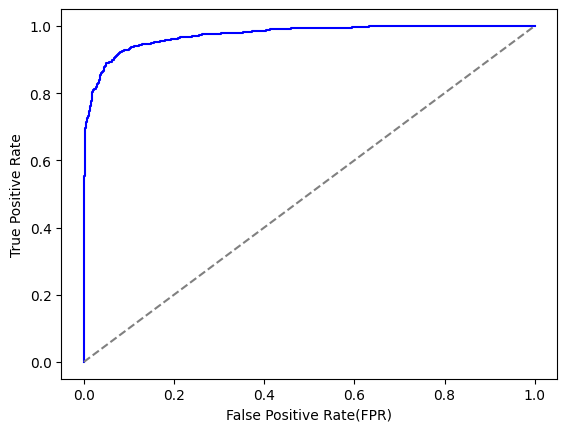

In [157]:
fig,ax=plt.subplots()
ax.plot(fpr_09,tpr_09,color='b')
ax.plot([0,1],[0,1],color='grey',linestyle='--')

ax.set_xlabel('False Positive Rate(FPR)')
ax.set_ylabel('True Positive Rate')

plt.show()

In [158]:
roc_auc_score(df_pca_pc_copy.y.to_numpy(), df_pca_pc_copy.pred_probability.to_numpy())

0.973639

According to the Accuracy and the ROC AUC value we can see that model fit_05 has the best performance on the training set.union.

Yes, the best model different when considering Accuracy vs ROC AUC

the best model is better than the intercept-only model.

there are 18 coefficients with the best model.

# Part v) Models_predictions

In [159]:
df_pca_pc

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0     15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1      1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2     -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3     11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4     -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   
...         ...       ...       ...       ...       ...       ...       ...   
1995  -8.715430 -0.846569 -3.360917  3.118721  0.679834  0.824780 -0.220803   
1996  12.265139 -2.827677 -1.433551 -0.579771 -0.467646 -0.176134  0.023991   
1997  -2.520887 -2.816976 -3.949757  2.800497  0.229569  0.921093 -1.541274   
1998   1.309858 -0.917317  3.843066 -1.200467  0.359514 -1.011323 -0.422281   
1999  -5.129967 -0.386370  0.455065 -1.809985  0.556173  1.174608 -0.059769   

          pc08      pc09      pc10  ...      pc71      pc72      pc73  \
0    -1.666939 -0.344578  0.005292  ... -0.000352 -0.000566 -0.000240   
1     0.343681 -0.172044 -1.702956  ...  0.000078 -0.000790  0.000121   
2    -0.469571  0.202670 -0.063525  ... -0.000090 -0.000367  0.000048   
3    -0.438922 -0.477582  0.490047  ... -0.001691  0.002393  0.000767   
4     0.033279  1.666200 -0.275579  ...  0.000808  0.000257 -0.000211   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.051704 -0.760408  1.060550  ...  0.000226  0.000534 -0.000102   
1996 -0.359324 -0.386753  0.167143  ... -0.000329  0.000787 -0.000269   
1997  0.828962 -0.628440  1.004422  ... -0.002068  0.002303 -0.000646   
1998 -0.085231 -0.059763 -0.794739  ...  0.000029  0.000465  0.000034   
1999 -1.082142  0.070539  0.129755  ... -0.001817  0.000273  0.000239   

          pc74      pc75      pc76          pc77          pc78  corrosion  y  
0    -0.001079  0.000979  0.000008  6.354348e-05  3.507294e-06        yes  1  
1     0.000560 -0.000023  0.000095 -1.646614e-05 -1.877016e-06         no  0  
2    -0.000068  0.000072  0.000090  1.439695e-05  4.904500e-07         no  0  
3     0.000058 -0.000909  0.000297  2.337983e-05 -9.526207e-07        yes  1  
4    -0.000113 -0.000209  0.000076  6.935187e-06  2.993971e-06         no  0  
...        ...       ...       ...           ...           ...        ... ..  
1995  0.000154  0.000209  0.000254  1.474073e-05 -2.736935e-06        yes  1  
1996 -0.000973  0.000317  0.000407  7.966389e-06  1.572269e-06        yes  1  
1997 -0.000760 -0.001684 -0.001626 -2.756498e-06 -1.058286e-06        yes  1  
1998 -0.000405  0.000038  0.000103  2.119544e-06  1.579796e-06        yes  1  
1999  0.000036 -0.000088 -0.000061 -8.043977e-07 -2.263726e-06        yes  1  

[2000 rows x 80 columns]

fit_05 the most important pcs are pc12,pc14, and pc15. 

In [160]:
dfviz_05=pd.DataFrame([(pc12,pc14,pc15) for pc12 in np.linspace(df_pca_pc.pc12.min(),df_pca_pc.pc12.max(),num=101) 
                                  for pc14 in np.linspace(df_pca_pc.pc14.min(),df_pca_pc.pc14.max(),num=5)
                                  for pc15 in np.linspace(df_pca_pc.pc15.min(),df_pca_pc.pc15.max(),num=5) 
                                  ], columns=['pc12','pc14','pc15'])

In [161]:
dfviz_05

pc12      pc14      pc15
0    -1.740245 -1.304131 -2.028592
1    -1.740245 -1.304131 -0.949640
2    -1.740245 -1.304131  0.129313
3    -1.740245 -1.304131  1.208265
4    -1.740245 -1.304131  2.287217
...        ...       ...       ...
2520  2.427421  1.746496 -2.028592
2521  2.427421  1.746496 -0.949640
2522  2.427421  1.746496  0.129313
2523  2.427421  1.746496  1.208265
2524  2.427421  1.746496  2.287217

[2525 rows x 3 columns]

In [162]:
dfviz_05['pc01'] =df_pca_pc.pc01.mean()
dfviz_05['pc02'] =df_pca_pc.pc02.mean()
dfviz_05['pc03']= df_pca_pc.pc03.mean()
dfviz_05['pc04'] =df_pca_pc.pc04.mean()
dfviz_05['pc05']=df_pca_pc.pc05.mean()
dfviz_05['pc06']= df_pca_pc.pc06.mean()
dfviz_05['pc07'] =df_pca_pc.pc07.mean()
dfviz_05['pc08']=df_pca_pc.pc08.mean()
dfviz_05['pc09']= df_pca_pc.pc09.mean()
dfviz_05['pc10']= df_pca_pc.pc10.mean()
dfviz_05['pc11']= df_pca_pc.pc11.mean()
dfviz_05['pc13']= df_pca_pc.pc13.mean()
dfviz_05['pc16']= df_pca_pc.pc16.mean()
dfviz_05['pc17']=df_pca_pc.pc17.mean()
dfviz_05['pc18']= df_pca_pc.pc18.mean()
dfviz_05['pc19']=df_pca_pc.pc19.mean()
dfviz_05['pc20']= df_pca_pc.pc20.mean()
dfviz_05['pc21']=df_pca_pc.pc21.mean()
dfviz_05['pc22']=df_pca_pc.pc22.mean()
dfviz_05['pc23']= df_pca_pc.pc23.mean()
dfviz_05['pc24']= df_pca_pc.pc24.mean()
dfviz_05['pc25']=  df_pca_pc.pc25.mean()
dfviz_05['pc26']=df_pca_pc.pc26.mean()
dfviz_05['pc27']=df_pca_pc.pc27.mean()
dfviz_05['pc28']= df_pca_pc.pc28.mean()
dfviz_05['pc29']= df_pca_pc.pc29.mean()
dfviz_05['pc30']= df_pca_pc.pc30.mean()
dfviz_05['pc31']= df_pca_pc.pc31.mean()
dfviz_05['pc32']= df_pca_pc.pc32.mean()
dfviz_05['pc33']= df_pca_pc.pc33.mean()
dfviz_05['pc34']= df_pca_pc.pc34.mean()
dfviz_05['pc35']=df_pca_pc.pc35.mean()
dfviz_05['pc36']= df_pca_pc.pc36.mean()
dfviz_05['pc37']=df_pca_pc.pc37.mean()
dfviz_05['pc38']= df_pca_pc.pc38.mean()
dfviz_05['pc39']=df_pca_pc.pc39.mean()
dfviz_05['pc40']= df_pca_pc.pc40.mean()
dfviz_05['pc41']= df_pca_pc.pc41.mean()
dfviz_05['pc42']= df_pca_pc.pc42.mean()
dfviz_05['pc43']= df_pca_pc.pc43.mean()
dfviz_05['pc44']= df_pca_pc.pc44.mean()
dfviz_05['pc45']= df_pca_pc.pc45.mean()
dfviz_05['pc46']= df_pca_pc.pc46.mean()
dfviz_05['pc47']=df_pca_pc.pc47.mean()
dfviz_05['pc48']= df_pca_pc.pc48.mean()
dfviz_05['pc49']= df_pca_pc.pc49.mean()
dfviz_05['pc50']= df_pca_pc.pc50.mean()
dfviz_05['pc51']= df_pca_pc.pc51.mean()
dfviz_05['pc52']= df_pca_pc.pc52.mean()
dfviz_05['pc53']=df_pca_pc.pc53.mean()
dfviz_05['pc54']= df_pca_pc.pc54.mean()
dfviz_05['pc55']= df_pca_pc.pc55.mean()
dfviz_05['pc56']= df_pca_pc.pc56.mean()
dfviz_05['pc57']= df_pca_pc.pc57.mean()
dfviz_05['pc58']= df_pca_pc.pc58.mean()
dfviz_05['pc59']= df_pca_pc.pc59.mean()
dfviz_05['pc60']= df_pca_pc.pc60.mean()
dfviz_05['pc61']= df_pca_pc.pc61.mean()
dfviz_05['pc62']= df_pca_pc.pc62.mean()
dfviz_05['pc63']= df_pca_pc.pc63.mean()
dfviz_05['pc64']= df_pca_pc.pc64.mean()
dfviz_05['pc65']= df_pca_pc.pc65.mean()
dfviz_05['pc66']= df_pca_pc.pc66.mean()
dfviz_05['pc67']=  df_pca_pc.pc67.mean()
dfviz_05['pc68']=df_pca_pc.pc68.mean()
dfviz_05['pc69']= df_pca_pc.pc69.mean()
dfviz_05['pc70']= df_pca_pc.pc70.mean()
dfviz_05['pc71']=  df_pca_pc.pc71.mean()
dfviz_05['pc72']= df_pca_pc.pc72.mean()
dfviz_05['pc73']=  df_pca_pc.pc73.mean()
dfviz_05['pc74']=  df_pca_pc.pc74.mean()
dfviz_05['pc75']= df_pca_pc.pc75.mean()
dfviz_05['pc76']= df_pca_pc.pc76.mean()
dfviz_05['pc77']= df_pca_pc.pc77.mean()
dfviz_05['pc78']= df_pca_pc.pc78.mean()

In [163]:
dfviz_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc12    2525 non-null   float64
 1   pc14    2525 non-null   float64
 2   pc15    2525 non-null   float64
 3   pc01    2525 non-null   float64
 4   pc02    2525 non-null   float64
 5   pc03    2525 non-null   float64
 6   pc04    2525 non-null   float64
 7   pc05    2525 non-null   float64
 8   pc06    2525 non-null   float64
 9   pc07    2525 non-null   float64
 10  pc08    2525 non-null   float64
 11  pc09    2525 non-null   float64
 12  pc10    2525 non-null   float64
 13  pc11    2525 non-null   float64
 14  pc13    2525 non-null   float64
 15  pc16    2525 non-null   float64
 16  pc17    2525 non-null   float64
 17  pc18    2525 non-null   float64
 18  pc19    2525 non-null   float64
 19  pc20    2525 non-null   float64
 20  pc21    2525 non-null   float64
 21  pc22    2525 non-null   float64
 22  

In [164]:

# Define the desired column order
desired_order = [f'pc{i:02d}' for i in range(1, 79)]

# Create a new DataFrame with the desired column order
df_ordered = dfviz_05[desired_order]

In [165]:
df_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    2525 non-null   float64
 1   pc02    2525 non-null   float64
 2   pc03    2525 non-null   float64
 3   pc04    2525 non-null   float64
 4   pc05    2525 non-null   float64
 5   pc06    2525 non-null   float64
 6   pc07    2525 non-null   float64
 7   pc08    2525 non-null   float64
 8   pc09    2525 non-null   float64
 9   pc10    2525 non-null   float64
 10  pc11    2525 non-null   float64
 11  pc12    2525 non-null   float64
 12  pc13    2525 non-null   float64
 13  pc14    2525 non-null   float64
 14  pc15    2525 non-null   float64
 15  pc16    2525 non-null   float64
 16  pc17    2525 non-null   float64
 17  pc18    2525 non-null   float64
 18  pc19    2525 non-null   float64
 19  pc20    2525 non-null   float64
 20  pc21    2525 non-null   float64
 21  pc22    2525 non-null   float64
 22  

In [166]:
dfviz_05_copy=df_ordered.copy()

In [167]:
dfviz_05_copy['pred_probability_04'] =fit_04.predict(df_ordered)

In [168]:
dfviz_05_copy['pred_probability_05'] =fit_05.predict(df_ordered)

In [169]:
dfviz_05_copy

pc01          pc02          pc03          pc04          pc05  \
0     1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
1     1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
2     1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
3     1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
4     1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
...            ...           ...           ...           ...           ...   
2520  1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
2521  1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
2522  1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
2523  1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   
2524  1.421085e-17 -1.776357e-17 -1.065814e-17  3.552714e-17  1.065814e-17   

              pc06          pc07          pc08          pc09          pc10  \
0     1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
1     1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
2     1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
3     1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
4     1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
...            ...           ...           ...           ...           ...   
2520  1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
2521  1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
2522  1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
2523  1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   
2524  1.776357e-18 -7.105427e-18  1.509903e-17 -1.243450e-17 -2.575717e-17   

      ...          pc71          pc72          pc73          pc74  \
0     ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
1     ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
2     ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
3     ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
4     ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
...   ...           ...           ...           ...           ...   
2520  ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
2521  ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
2522  ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
2523  ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   
2524  ...  1.335737e-17 -1.065120e-18 -1.233388e-18 -1.484576e-17   

              pc75          pc76          pc77          pc78  \
0     3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
1     3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
2     3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
3     3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
4     3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
...            ...           ...           ...           ...   
2520  3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
2521  3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
2522  3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
2523  3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   
2524  3.128444e-17 -1.559256e-17 -3.278608e-17  3.733835e-18   

      pred_probability_04  pred_probability_05  
0                1.000000         6.238510e-13  
1                1.000000         1.221524e-10  
2                1.000000         2.391792e-08  
3                1.000000         4.683200e-06  
4                0.999999         9.161528e-04  
...                   ...                  ...  
2520             1.000000         1.000000e+00  
2521             0.999999         1.000000e+00  
2522             0.999999         1.000000e+00  
2523             0.999996         1.000000e+00  
252

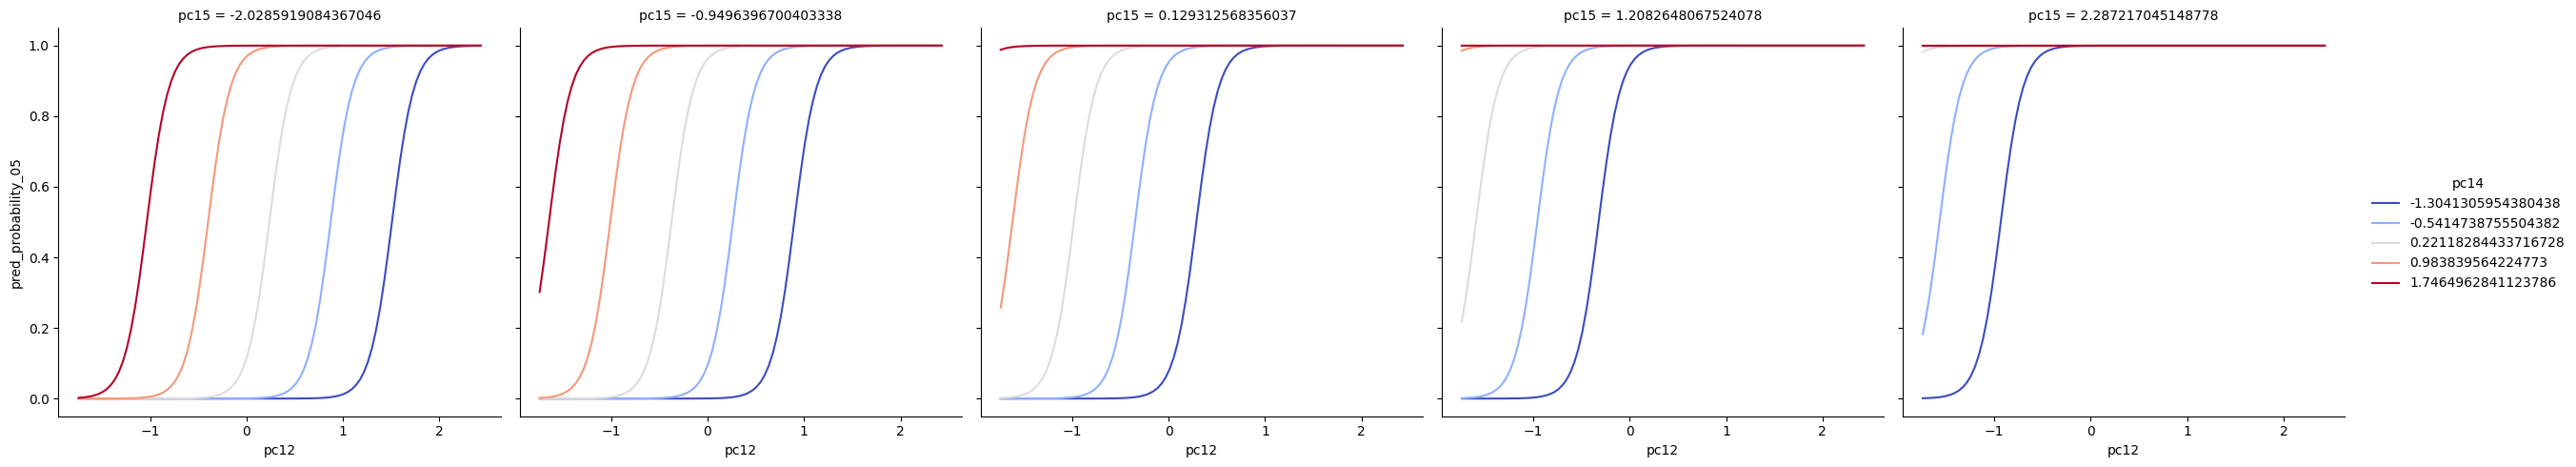

In [170]:
sns.relplot(data =dfviz_05_copy,x='pc12',y='pred_probability_05',kind ='line',
            hue='pc14',col='pc15',
            palette ='coolwarm', estimator =None
            )

plt.show()

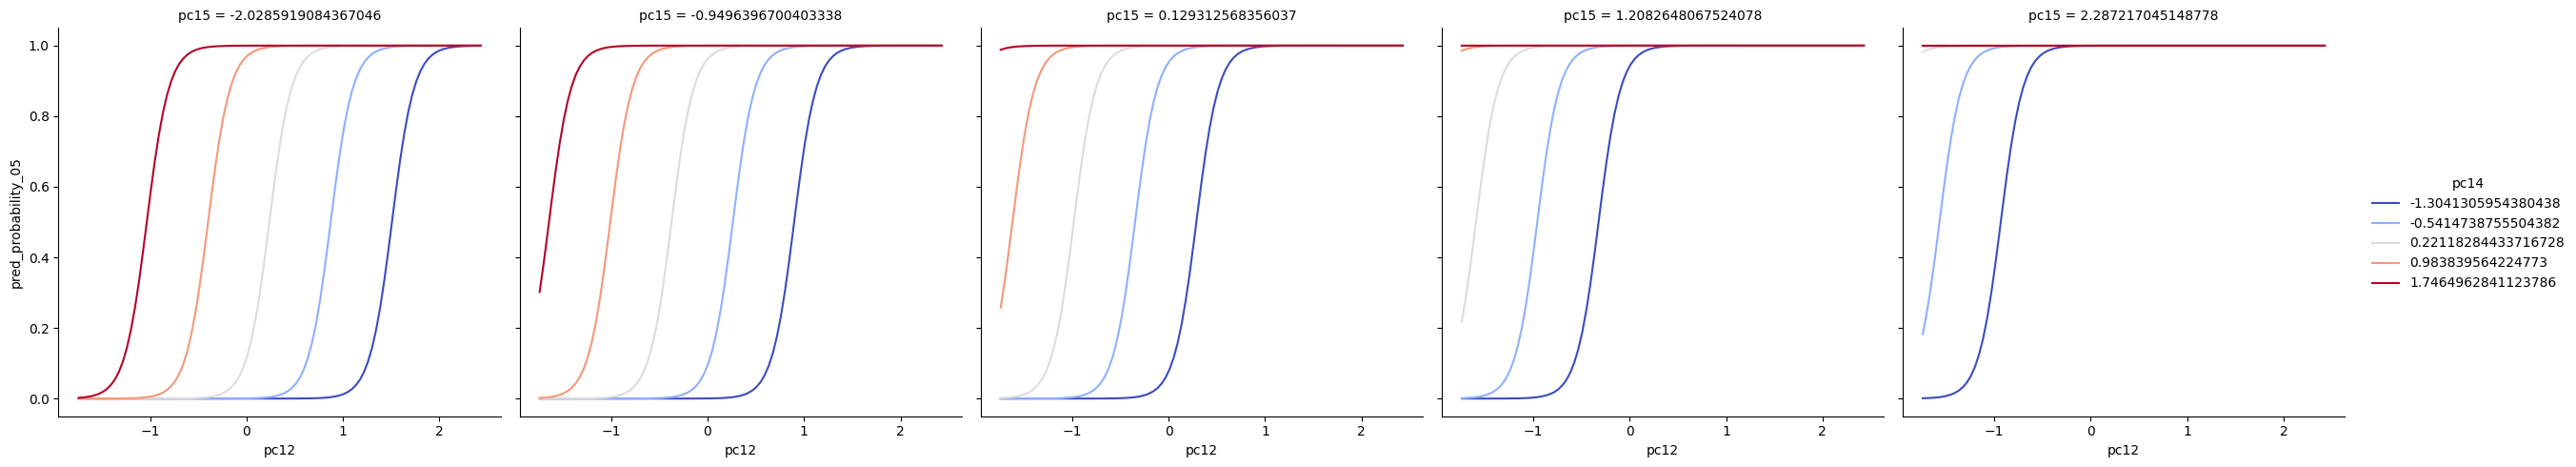

In [171]:
sns.relplot(data =dfviz_05_copy,x='pc12',y='pred_probability_05',kind ='line',
            hue='pc14',col='pc15',
            palette ='coolwarm', estimator =None
            )

plt.show()

# Part vi) Models -performance and Validation

In [172]:
formula_list = ['y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09+pc10+pc11+pc12+pc13+pc14+pc15+pc16+pc17',
                'y~pc01+pc02+pc03+pc04+pc05+pc06',
                'y~(pc01+pc02+pc03+pc04+pc05+pc06)**2']

In [173]:
from sklearn.model_selection import StratifiedKFold

In [174]:
kf=StratifiedKFold(n_splits=5, shuffle =True, random_state=121)

In [175]:
df_pca_pc

pc01      pc02      pc03      pc04      pc05      pc06      pc07  \
0     15.674456 -1.596585 -3.160125  1.180937 -0.412671 -0.593295  1.762136   
1      1.464405  4.402745  0.773099 -0.260964  4.410206  1.024492  1.231745   
2     -2.379065  4.820816  0.876922 -3.048897  0.535150  0.535423  0.001494   
3     11.050159 -2.327017 -1.546891 -0.609550 -0.057390 -0.393883 -0.425742   
4     -0.040738  4.560104  1.847360  2.985848 -1.034610  0.866242 -0.201950   
...         ...       ...       ...       ...       ...       ...       ...   
1995  -8.715430 -0.846569 -3.360917  3.118721  0.679834  0.824780 -0.220803   
1996  12.265139 -2.827677 -1.433551 -0.579771 -0.467646 -0.176134  0.023991   
1997  -2.520887 -2.816976 -3.949757  2.800497  0.229569  0.921093 -1.541274   
1998   1.309858 -0.917317  3.843066 -1.200467  0.359514 -1.011323 -0.422281   
1999  -5.129967 -0.386370  0.455065 -1.809985  0.556173  1.174608 -0.059769   

          pc08      pc09      pc10  ...      pc71      pc72      pc73  \
0    -1.666939 -0.344578  0.005292  ... -0.000352 -0.000566 -0.000240   
1     0.343681 -0.172044 -1.702956  ...  0.000078 -0.000790  0.000121   
2    -0.469571  0.202670 -0.063525  ... -0.000090 -0.000367  0.000048   
3    -0.438922 -0.477582  0.490047  ... -0.001691  0.002393  0.000767   
4     0.033279  1.666200 -0.275579  ...  0.000808  0.000257 -0.000211   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.051704 -0.760408  1.060550  ...  0.000226  0.000534 -0.000102   
1996 -0.359324 -0.386753  0.167143  ... -0.000329  0.000787 -0.000269   
1997  0.828962 -0.628440  1.004422  ... -0.002068  0.002303 -0.000646   
1998 -0.085231 -0.059763 -0.794739  ...  0.000029  0.000465  0.000034   
1999 -1.082142  0.070539  0.129755  ... -0.001817  0.000273  0.000239   

          pc74      pc75      pc76          pc77          pc78  corrosion  y  
0    -0.001079  0.000979  0.000008  6.354348e-05  3.507294e-06        yes  1  
1     0.000560 -0.000023  0.000095 -1.646614e-05 -1.877016e-06         no  0  
2    -0.000068  0.000072  0.000090  1.439695e-05  4.904500e-07         no  0  
3     0.000058 -0.000909  0.000297  2.337983e-05 -9.526207e-07        yes  1  
4    -0.000113 -0.000209  0.000076  6.935187e-06  2.993971e-06         no  0  
...        ...       ...       ...           ...           ...        ... ..  
1995  0.000154  0.000209  0.000254  1.474073e-05 -2.736935e-06        yes  1  
1996 -0.000973  0.000317  0.000407  7.966389e-06  1.572269e-06        yes  1  
1997 -0.000760 -0.001684 -0.001626 -2.756498e-06 -1.058286e-06        yes  1  
1998 -0.000405  0.000038  0.000103  2.119544e-06  1.579796e-06        yes  1  
1999  0.000036 -0.000088 -0.000061 -8.043977e-07 -2.263726e-06        yes  1  

[2000 rows x 80 columns]

In [176]:
input_names=df_pca_pc.drop(columns=['corrosion','y']).copy().columns.to_list()

In [177]:
output_name ='y'

In [178]:
def train_and_test_logistic_with_cv(mod_name, a_formula, data_df, x_names, y_name, cv, threshold=0.5):
    # separate the inputs and output
    input_df = data_df.loc[ :, x_names ].copy()
    
    # initialize the performance metric storage lists
    train_res = []
    test_res = []
    
    # SPLIT the data and iterate over the folds
    for train_id, test_id in cv.split( input_df.to_numpy(), data_df[ y_name ].to_numpy() ):
        # subset the training and test splits within each fold
        train_data = data_df.iloc[ train_id, :].copy()
        test_data = data_df.iloc[ test_id, :].copy()
        
        # FIT the model on the TRAINING data within the current FOLD
        a_mod = smf.logit(formula=a_formula, data=train_data).fit()
        
        # PREDICT the TRAINING within each FOLD
        train_copy = train_data.copy()
        train_copy['pred_probability'] = a_mod.predict( train_data )
        train_copy['pred_class'] = np.where( train_copy.pred_probability > threshold, 1, 0 )
        
        # PREDICT the TESTING within each FOLD
        test_copy = test_data.copy()
        test_copy['pred_probability'] = a_mod.predict( test_data )
        test_copy['pred_class'] = np.where( test_copy.pred_probability > threshold, 1, 0)
        
        # calculate the PERFORMANCE METRIC on the TRAINING SET within the FOLD
        train_res.append( np.mean( train_copy[ y_name ] == train_copy.pred_class ) )
        
        # calculate the PERFORMANCE METRIC on the TESTING SET within the FOLD
        test_res.append( np.mean( test_copy[ y_name ] == test_copy.pred_class ) )
    
    # book keeping to store the results
    train_df = pd.DataFrame({'Accuracy': train_res})
    train_df['from_set'] = 'training'
    train_df['fold_id'] = train_df.index + 1
    
    test_df = pd.DataFrame({'Accuracy': test_res})
    test_df['from_set'] = 'testing'
    test_df['fold_id'] = test_df.index + 1
    
    # combine the splits together
    res_df = pd.concat([train_df, test_df], ignore_index=True)
    
    # add information about the model
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = len( a_mod.params )
    res_df['threshold'] = threshold
    
    return res_df

In [179]:
train_and_test_logistic_with_cv(0, formula_list[0], data_df=df_pca_pc, x_names=input_names, y_name=output_name, cv=kf)

Optimization terminated successfully.
         Current function value: 0.125758
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.130624
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.127518
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.107038
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.133527
         Iterations 11


Accuracy  from_set  fold_id  model_name  \
0  0.954375  training        1           0   
1  0.953125  training        2           0   
2  0.956250  training        3           0   
3  0.962500  training        4           0   
4  0.951875  training        5           0   
5  0.950000   testing        1           0   
6  0.965000   testing        2           0   
7  0.947500   testing        3           0   
8  0.935000   testing        4           0   
9  0.965000   testing        5           0   

                                       model_formula  num_coefs  threshold  
0  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
1  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
2  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
3  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
4  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
5  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
6  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
7  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
8  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
9  y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5

In [180]:
results_list = []

for m in range( len(formula_list) ):
    print( '-- Formula ID %d -- ' % m )
    
    results_list.append( train_and_test_logistic_with_cv(m, formula_list[m], data_df=df_pca_pc, x_names=input_names, y_name=output_name, cv=kf) )

-- Formula ID 0 -- 
Optimization terminated successfully.
         Current function value: 0.125758
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.130624
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.127518
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.107038
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.133527
         Iterations 11
-- Formula ID 1 -- 
Optimization terminated successfully.
         Current function value: 0.207286
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214707
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202325
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.190130
         Iterations 9
Optimization terminated successfully.

In [181]:
len(results_list)

3

In [182]:
cv_results = pd.concat( results_list, ignore_index=True )

In [183]:
cv_results

Accuracy  from_set  fold_id  model_name  \
0   0.954375  training        1           0   
1   0.953125  training        2           0   
2   0.956250  training        3           0   
3   0.962500  training        4           0   
4   0.951875  training        5           0   
5   0.950000   testing        1           0   
6   0.965000   testing        2           0   
7   0.947500   testing        3           0   
8   0.935000   testing        4           0   
9   0.965000   testing        5           0   
10  0.920000  training        1           1   
11  0.914375  training        2           1   
12  0.923750  training        3           1   
13  0.926250  training        4           1   
14  0.915625  training        5           1   
15  0.925000   testing        1           1   
16  0.935000   testing        2           1   
17  0.900000   testing        3           1   
18  0.895000   testing        4           1   
19  0.932500   testing        5           1   
20  0.936250  training        1           2   
21  0.948125  training        2           2   
22  0.946250  training        3           2   
23  0.951875  training        4           2   
24  0.939375  training        5           2   
25  0.950000   testing        1           2   
26  0.942500   testing        2           2   
27  0.927500   testing        3           2   
28  0.927500   testing        4           2   
29  0.945000   testing        5           2   

                                        model_formula  num_coefs  threshold  
0   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
1   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
2   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
3   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
4   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
5   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
6   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
7   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
8   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
9   y~pc01+pc02+pc03+pc04+pc05+pc06+pc07+pc08+pc09...         18        0.5  
10                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
11                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
12                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
13                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
14                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
15                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
16                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
17                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
18                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
19                    y~pc01+pc02+pc03+pc04+pc05+pc06          7        0.5  
20               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
21               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
22               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
23               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
24               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
25               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
26               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
27               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
28               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5  
29               y~(pc01+pc02+pc03+pc04+pc05+pc06)**2         22        0.5

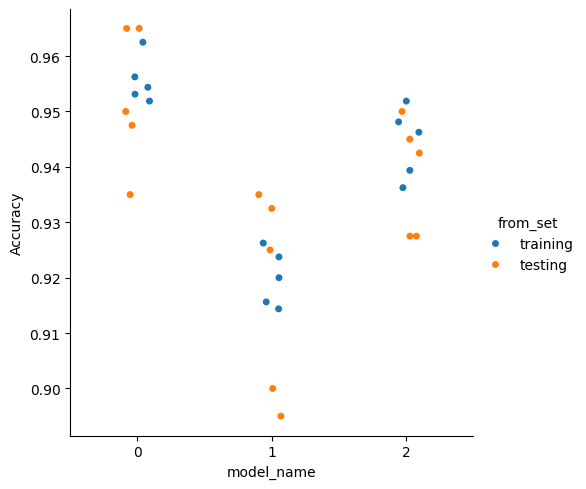

In [184]:
sns.catplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set')

plt.show()

/var/folders/yf/nl1847pd63n6w_03nyrdycn80000gn/T/ipykernel_97520/2894161676.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', join=False, ax=ax)


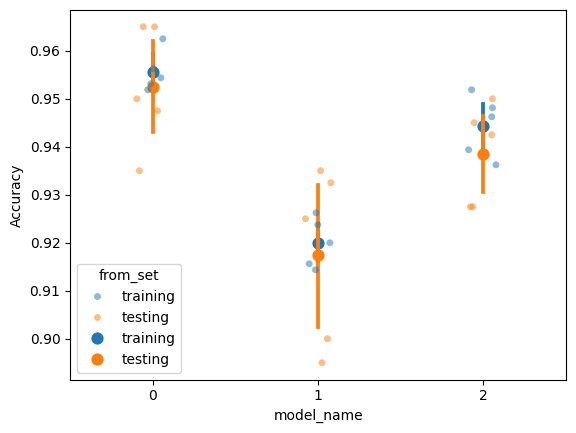

In [185]:
fig, ax = plt.subplots()

sns.stripplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', alpha=0.5, ax=ax)

sns.pointplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', join=False, ax=ax)

plt.show()

/var/folders/yf/nl1847pd63n6w_03nyrdycn80000gn/T/ipykernel_97520/3054396630.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', kind='point', join=False)


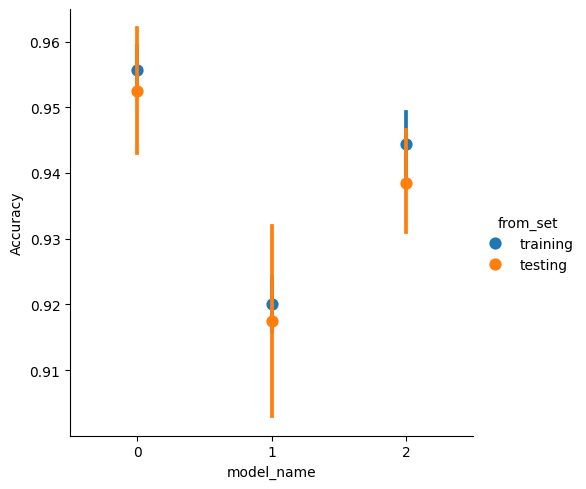

In [186]:
sns.catplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', kind='point', join=False)

plt.show()

The 0th model is the best according to cross-validation.

No, it is the same with the model idenfied as the best according to the training set.

There are 18 regression coefficients are associated with the best model.